In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from python.plugins import checkdir
%matplotlib inline

import matplotlib.pyplot as plt
import mplhep as hep
from mplhep.plot import soft_update_kwargs
plt.style.use([hep.style.CMS, hep.style.firamath])

In [2]:
#### Plot dijet systematics
# fname = "coffeaOutput/dijet/dijetHistsTestJetHT_pt200.0_rapidity2.5hemveto2018.pkl"
# with open(fname, "rb") as f:
#     result_data = pickle.load( f )
# fname = "coffeaOutput/dijet/dijetHistsTest_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018.pkl"
# with open(fname, "rb") as f:
#     result_mc = pickle.load( f )
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_allUnc2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
year = fname[-8:-4]
# fname = "coffeaOutput/trijetHists_JetHT_pt200-Copy1.0_rappidity2.5_NoneHEMveto2018.pkl"
# with open(fname, "rb") as f:
#     result_mc_older = pickle.load( f )
if "trijet" in fname:
    os_path = 'plots/syst/trijet/'
else: os_path = 'plots/syst/dijet/'
# print(result_mc['cutflow'])
os_path=os_path+"test"
checkdir(os_path)

Hists in file:  dict_keys(['alljet_ptreco_mreco', 'btag_eta', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_phi_gen', 'jet_phi_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'misses_g', 'fakes_g', 'misses', 'fakes', 'weights', 'fakes_eta_phi', 'fakes_asymm_dphi', 'ptreco_mreco_u', 'ptreco_mreco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'systematics'])
Axes in pt mass reco hist:  ['syst', 'ptreco', 'mreco']


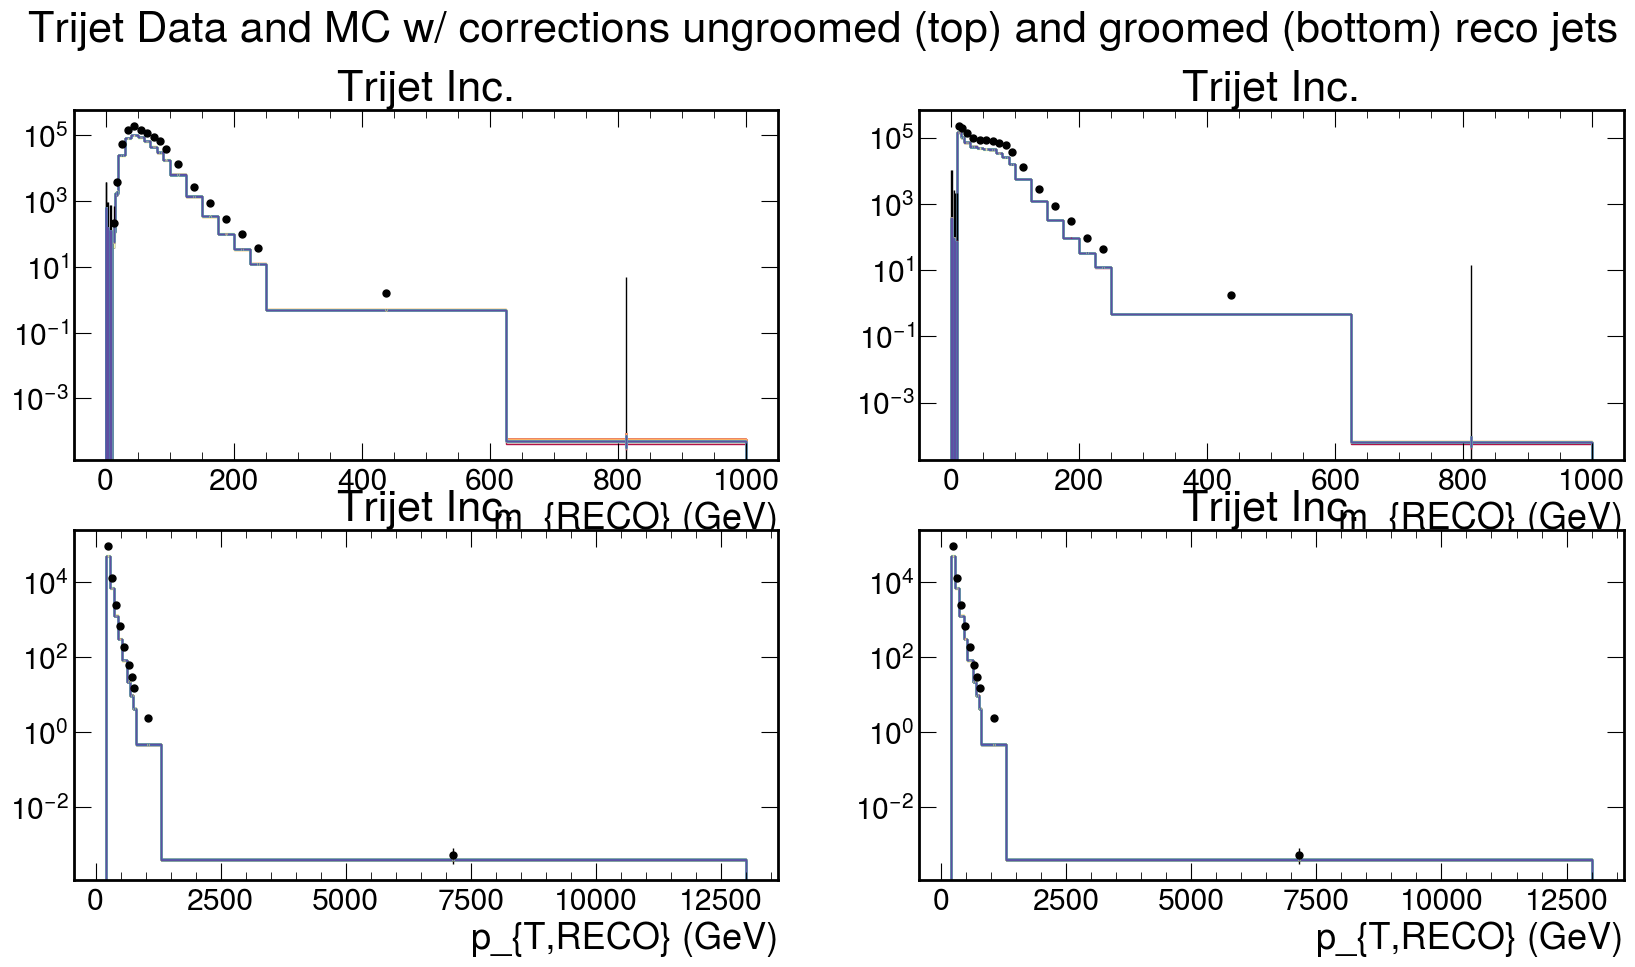

<Figure size 2000x1000 with 0 Axes>

In [3]:
plt.rcParams["figure.figsize"] = (20,10)
print("Hists in file: ", result_mc.keys())
hist = 'ptreco_mreco'
# histdata = 'jet_pt_mass_reco'
axis_names = [ax.name for ax in result_mc[hist+'_u'].axes]
print("Axes in pt mass reco hist: ", axis_names)
systcats = [cat for cat in result_mc['response_matrix_u'][{'ptreco':sum,'mreco':sum, 'ptgen':sum, 'ptgen':sum}].axes[0]]
pt_bins = [bin for bin in result_mc['response_matrix_u'].project("ptreco").axes[0]]
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
colors2 = plt.cm.Spectral(np.linspace(0,1,60))
fig.suptitle('Trijet Data and MC w/ corrections ungroomed (top) and groomed (bottom) reco jets')
data = [result_data[hist+'_u'][{'syst':'nominal'}].project('mreco'), 
        result_data[hist+'_g'][{'syst':'nominal'}].project('mreco'),
       result_data[hist+'_u'][{'syst':'nominal'}].project('ptreco'), 
        result_data[hist+'_g'][{'syst':'nominal'}].project('ptreco')]
# mc_older = [result_mc_older[hist+'_u'].project('mreco'), 
#         result_mc_older[hist+'_g'].project('mreco'),
#        result_mc_older[hist+'_u'].project('ptreco'), 
#         result_mc_older[hist+'_g'].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=True,
             ax=ax, density=False, marker =["."], color = 'black',
             label=['Trijet Data'])
    # hep.histplot(mc_older[i], stack=False, histtype='errorbar', binwnorm=True,
    #          ax=ax, density=False, marker =["."], color = 'teal',
    #          label=['MC w/o xs scaling'])
    for k in range(len(systcats)):
        syst = systcats[k]
        if syst != "nominal":
            mc = [result_mc['response_matrix_u'][{'syst':syst}].project('mreco'), 
              result_mc['response_matrix_g'][{'syst':syst}].project('mreco'),
              result_mc['response_matrix_u'][{'syst':syst}].project('ptreco'), 
              result_mc['response_matrix_g'][{'syst':syst}].project('ptreco')]
            hep.histplot(mc[i], stack=False, histtype='step', binwnorm=True,
                 ax=ax, linestyle =["-"], linewidth=1,
                 label=['QCD sim '+syst])
    ax.set_title("Trijet Inc.")
    # ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
plt.show()
plt.savefig(os_path+"/compareDataMC_wXSscaling_wcorrlog.png")

In [4]:
def getTotSyst(result, histname, axis='mreco'):
    hist = result[histname]
    availSysts = [ax for ax in result[histname].project("syst").axes[0]]
    syst_uncorr = [
    'jerUp','jerDown'
    'PUSFUp','PUSFDown', #PDFs WIP
    'L1prefiringDown', 'L1prefiringUp', 
    'AbsoluteStatUp','AbsoluteStatDown',
    'FlavorQCDUp','FlavorQCDDown',
    'FragmentationUp','FragmentationDown',
    'PileUpDataMCUp','PileUpDataMCDown',
    'RelativeBalUp','RelativeBalDown',
    'RelativeJEREC1Up','RelativeJEREC1Down',
    'RelativeJEREC2Up','RelativeJEREC2Down',
    'RelativePtEC1Up','RelativePtEC1Down',
    'RelativePtEC2Up','RelativePtEC2Down',
    'RelativeSampleUp','RelativeSampleDown',
    'RelativeStatECUp','RelativeStatECDown',
    'RelativeStatFSRUp','RelativeStatFSRDown',
    'RelativeStatHFUp','RelativeStatHFDown',
]

    absolute = ['AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown',
                'AbsoluteScaleUp', 'AbsoluteScaleDown']
    pileuppt = ['PileUpPtBBUp', 'PileUpPtBBDown', 
                'PileUpPtEC1Up', 'PileUpPtEC1Down',
                'PileUpPtEC2Up', 'PileUpPtEC2Down', 
                'PileUpPtHFUp', 'PileUpPtHFDown', 
                'PileUpPtRefUp', 'PileUpPtRefDown']
    relpt = ['RelativePtEC1Up', 'RelativePtEC1Down','RelativePtHFUp', 'RelativePtHFDown']
    singlepion =     ['SinglePionECALUp', 'SinglePionECALDown','SinglePionHCALUp', 'SinglePionHCALDown']
    timepteta = ['TimePtEtaUp', 'TimePtEtaDown']

    availSysts = [syst for syst in availSysts if availSysts]
    syst_list = [syst for syst in availSysts if syst!="nominal" and syst not in syst_uncorr]
    syst_uncorr = [syst for syst in syst_uncorr if syst in availSysts]
    corr_grps = [absolute, pileuppt, relpt, singlepion, timepteta]
    sysErr = {}  
    for syst in availSysts:
        sysErr.update({syst: hist[{'syst':syst}].project(axis).values()})
    nom_values = hist[{'syst':'nominal'}].project(axis).values()
    sysErrTot_up = np.zeros_like(nom_values)
    sysErrTot_dn = np.zeros_like(nom_values)
    #### Loop through uncorrelated groups and make 
    for grp in corr_grps:
        grp_unc_total_up  = np.zeros_like(nom_values)
        grp_unc_total_dn  = np.zeros_like(nom_values)
        for syst in grp:
            if syst in availSysts:
                syst_vals = sysErr[syst]
                if "Up" in syst:
                    deltasys = abs(syst_vals-nom_values)
                    grp_unc_total_up += deltasys
                if "Down" in syst:
                    deltasys = abs(nom_values-syst_vals)
                    grp_unc_total_dn += deltasys
        sysErrTot_up += grp_unc_total_up**2
        sysErrTot_dn += grp_unc_total_dn**2
    #### Loop through uncorrelated uncertainties and add together with correlated groups
    for syst, syst_vals in sysErr.items():
        if "Up" in syst and syst in syst_uncorr:
            deltasys = syst_vals-nom_values
            sysErrTot_up = sysErrTot_up + deltasys**2
        if "Down" in syst and syst in syst_uncorr:
            deltasys = nom_values-syst_vals
            sysErrTot_dn = sysErrTot_dn + deltasys**2
    sysErrTot_up = sysErrTot_up**0.5
    sysErrTot_dn = sysErrTot_dn**0.5
    return sysErrTot_up, sysErrTot_dn

In [5]:
#### Function for crosschecking adding of uncertainties in TUnfold --> Should be same
def getTotSystUnrolled(result, histname, axis='mgen'):
    hist = result[histname]
    availSysts = [ax for ax in result[histname].project("syst").axes[0]]
    pt_bins = [bin[0] for bin in result[histname].project('ptgen').axes[0]]
    syst_uncorr = [
    'jerUp','jerDown'
    'PUSFUp','PUSFDown', #PDFs WIP
    'L1prefiringDown', 'L1prefiringUp', 
    'AbsoluteStatUp','AbsoluteStatDown',
    'FlavorQCDUp','FlavorQCDDown',
    'FragmentationUp','FragmentationDown',
    'PileUpDataMCUp','PileUpDataMCDown',
    'RelativeBalUp','RelativeBalDown',
    'RelativeJEREC1Up','RelativeJEREC1Down',
    'RelativeJEREC2Up','RelativeJEREC2Down',
    'RelativePtEC1Up','RelativePtEC1Down',
    'RelativePtEC2Up','RelativePtEC2Down',
    'RelativeSampleUp','RelativeSampleDown',
    'RelativeStatECUp','RelativeStatECDown',
    'RelativeStatFSRUp','RelativeStatFSRDown',
    'RelativeStatHFUp','RelativeStatHFDown',
]

    absolute = ['AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown',
                'AbsoluteScaleUp', 'AbsoluteScaleDown']
    pileuppt = ['PileUpPtBBUp', 'PileUpPtBBDown', 
                'PileUpPtEC1Up', 'PileUpPtEC1Down',
                'PileUpPtEC2Up', 'PileUpPtEC2Down', 
                'PileUpPtHFUp', 'PileUpPtHFDown', 
                'PileUpPtRefUp', 'PileUpPtRefDown']
    relpt = ['RelativePtEC1Up', 'RelativePtEC1Down','RelativePtHFUp', 'RelativePtHFDown']
    singlepion =     ['SinglePionECALUp', 'SinglePionECALDown','SinglePionHCALUp', 'SinglePionHCALDown']
    timepteta = ['TimePtEtaUp', 'TimePtEtaDown']

    availSysts = [syst for syst in availSysts if availSysts]
    syst_list = [syst for syst in availSysts if syst!="nominal" and syst not in syst_uncorr]
    syst_uncorr = [syst for syst in syst_uncorr if syst in availSysts]
    corr_grps = [absolute, pileuppt, relpt, singlepion, timepteta]
    perBin_up = {}
    perBin_down = {}
    for i, bin in enumerate(pt_bins):
        sysErr = {}  
        for syst in availSysts:
            sysErr.update({syst: hist[{'ptgen':i,'syst':syst}].project(axis).values()})
        nom_values = hist[{'ptgen':i,'syst':'nominal'}].project(axis).values()
        sysErrTot_up = np.zeros_like(nom_values)
        sysErrTot_dn = np.zeros_like(nom_values)
        #### Loop through uncorrelated groups and make 
        for grp in corr_grps:
            grp_unc_total_up  = np.zeros_like(nom_values)
            grp_unc_total_dn  = np.zeros_like(nom_values)
            for syst in grp:
                if syst in availSysts:
                    syst_vals = sysErr[syst]
                    if "Up" in syst:
                        deltasys = abs(syst_vals-nom_values)
                        grp_unc_total_up += deltasys
                        print("Delta sys vals for syst ", syst, " ", deltasys)
                    if "Down" in syst:
                        deltasys = abs(nom_values-syst_vals)
                        grp_unc_total_dn += deltasys
                        print("Delta sys vals for syst ", syst, " ", deltasys)
            sysErrTot_up += grp_unc_total_up**2
            sysErrTot_dn += grp_unc_total_dn**2
        print("Correlated up unc. only for pt bin ", pt_bins[i], " ", sysErrTot_up)
        print("Correlated up unc. only for pt bin ", pt_bins[i], " ", sysErrTot_dn)
        #### Loop through uncorrelated uncertainties and add together with correlated groups
        for syst, syst_vals in sysErr.items():
            if "Up" in syst and syst in syst_uncorr:
                deltasys = syst_vals-nom_values
                sysErrTot_up = sysErrTot_up + deltasys**2
            if "Down" in syst and syst in syst_uncorr:
                deltasys = nom_values-syst_vals
                sysErrTot_dn = sysErrTot_dn + deltasys**2
        sysErrTot_up = sysErrTot_up**0.5
        sysErrTot_dn = sysErrTot_dn**0.5
        perBin_up[str(pt_bins[i])]=sysErrTot_up
        perBin_down[str(pt_bins[i])]=sysErrTot_dn
    return perBin_up, perBin_down

In [6]:
perBin_up, perBin_down = getTotSystUnrolled(result_mc, 'response_matrix_u')
print(perBin_up, perBin_down)

Delta sys vals for syst  AbsoluteMPFBiasUp   [    0.             0.             0.            40.02498087
  4568.97649866 10560.86334845  5760.9437852   1513.43805141
   610.0453146      0.             0.             0.        ]
Delta sys vals for syst  AbsoluteMPFBiasDown   [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.64637635e+00
 3.07255405e+03 9.75805432e+03 7.08620727e+03 2.25712947e+03
 2.01159727e+02 1.42108547e-14 0.00000000e+00 0.00000000e+00]
Delta sys vals for syst  AbsoluteScaleUp   [   0.            0.            0.           17.06217103 1937.9588415
 3836.84095653 2260.64669782  702.39891665  267.58764632    0.
    0.            0.        ]
Delta sys vals for syst  AbsoluteScaleDown   [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.96447486e-01
 1.11526594e+03 3.61302227e+03 2.35200127e+03 9.31215137e+02
 5.01906674e+01 1.42108547e-14 0.00000000e+00 0.00000000e+00]
Delta sys vals for syst  PileUpPtBBUp   [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.03021049e-02
 9.9

In [7]:
from hist.intervals import ratio_uncertainty
def plotDataMCwErrors(result_mc, result_data, hist_mc, hist_data, axVar, IOV, channel = "", norm = False, rax_lim=None):
    stat_unc_up = result_mc[hist_mc][{'syst':'nominal'}].project(axVar).variances()**0.5
    stat_unc_down = result_mc[hist_mc][{'syst':'nominal'}].project(axVar).variances()**0.5
    syst_unc_up, syst_unc_down = getTotSyst(result_mc, hist_mc, axis=axVar)
    print("Syst unc up vals: ", syst_unc_up)
    print("Syst unc down vals: ", syst_unc_down)
    #### following opts may be unnecessary
    tot_error_opts = {
            'label': 'Stat. + Syst. Unc.',
            'facecolor': 'orange',

            'linewidth': 0
        }
    stat_error_opts = {
            'label': 'Stat. Unc.',
                    'hatch': '///',
                    'edgecolor': 'black',
            'facecolor': 'none',
            'linewidth': 0
        }
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }
    datahist = result_data[hist_data][{'syst':'nominal'}]
    mchist = result_mc[hist_mc][{'syst':'nominal'}]
    availAxes = [ax.name for ax in result_mc[hist_mc].axes]
    edges = [bin[0] for bin in result_mc[hist_mc].project(axVar).axes[0]] + [result_mc[hist_mc].project(axVar).axes[0][-1][1]]
    widths = result_mc[hist_mc].project(axVar).axes[0].widths
    print("widths", widths)
    xlim = edges[-1]
    fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
    ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
    ax.set_ylabel(r'$\frac{Events}{Bin Size} (GeV^{-1})$', loc = 'top')
    if "pt" in axVar or "m"==axVar[0]: 
        ax.set_yscale('log')
    if "_g" in hist_mc and "m"==axVar[0]:
        ax.set_xlabel(r'$m_{SD, RECO} (GeV)$' )
    else:
        ax.set_xlabel(r'$m_{SD, RECO} (GeV)$' )
    ratio = np.ones_like(result_mc[hist_mc].project(axVar).values())
    #### Fill ratio plot
    rax.set_xlabel(None)
    if norm:
        mcvals = mchist.project(axVar)*1.0/mchist.project(axVar).integrate(axVar).value
        datavals = datahist.project(axVar)*1.0/datahist.project(axVar).integrate(axVar).value
        stat_unc_up = stat_unc_up*1.0/mchist.project(axVar).integrate(axVar).value
        stat_unc_down = stat_unc_down*1.0/mchist.project(axVar).integrate(axVar).value
        syst_unc_up = syst_unc_up*1.0/mchist.project(axVar).integrate(axVar).value
        syst_unc_down = syst_unc_down*1.0/mchist.project(axVar).integrate(axVar).value
    else:
        mcvals = mchist.project(axVar)
        datavals = datahist.project(axVar)
    ratio = np.divide(mcvals.values(),datavals.values(),
                      out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),
                      where=datavals.values()!= 0,)
    #### Add MC error bars
    print("Total unc up: ", mcvals.values()+stat_unc_up+syst_unc_up)

    ax.stairs(values=(mcvals.values()+(stat_unc_up**2+syst_unc_up**2)**0.5)/widths, edges = edges, baseline= (mcvals.values()-(stat_unc_down**2+syst_unc_down**2)**0.5)/widths,
                fill=True,
                **tot_error_opts,
            )
    ax.stairs(values=(mcvals.values()+stat_unc_up)/widths, edges = edges, baseline= (mcvals.values()-stat_unc_down)/widths,
                fill=True,
                **stat_error_opts,
            )
    hep.histplot(datavals, stack=False, histtype='errorbar',
                 ax=ax, marker =["."], color = 'Black', linewidth=1, binwnorm=True,
                 label=channel + " Data")
    hep.histplot(mcvals, stack=False, histtype='step',
                 ax=ax, linestyle ='-', color = 'Black', linewidth=1, binwnorm=True,
                 label=channel + " MC")
    ax.autoscale(axis='x', tight=True)
    #### Want to stack uncertainties
        # print("Values in bins: ", mchist.project(axVar).values(), " errors of bins ", mchist.project(axVar).variances())
    if rax_lim != None:
        rax.set_ylim(rax_lim[0], rax_lim[1])
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)
    #### Get ratio err values and plot
    ratio_totterr_up = np.divide((mcvals.values()+(stat_unc_up**2+syst_unc_up**2)**0.5),datavals.values(),
                      out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),
                      where=datavals.values()!= 0,)
    ratio_totterr_down = np.divide(mcvals.values()-(stat_unc_down**2+syst_unc_down**2)**0.5,datavals.values(),
                      out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),
                      where=datavals.values()!= 0,)
    ratio_statterr_up = np.divide(mcvals.values()+stat_unc_up,datavals.values(),
                      out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),
                      where=datavals.values()!= 0,)
    ratio_statterr_down = np.divide(mcvals.values()-stat_unc_up,datavals.values(),
                      out=np.empty(np.array(mcvals.values()).shape).fill(np.nan),
                      where=datavals.values()!= 0,)
    rax.stairs(values=ratio_totterr_up, edges = edges, baseline= ratio_totterr_down,
                fill=True,
                **tot_error_opts,
            )
    rax.stairs(values=ratio_statterr_up, edges = edges, baseline= ratio_statterr_down,
                fill=True,
                **stat_error_opts,
            )
    hep.histplot(ratio, edges, histtype='step', ax=rax, linestyle ="-", color = 'black', linewidth=1)
    hep.histplot(np.ones_like(ratio), edges, histtype='step',ax=rax,linestyle ="--", color = 'black', linewidth=1)
    
    rax.set_ylabel(r'$\frac{MC}{Data}$', loc = 'center')
    if ("eta" in axVar) | ("phi" in axVar):
        rax.set_xlim(-xlim, xlim)
    elif "pt" in axVar:
        rax.set_xlim(0, 2000)
        # rax.set_ylim(0.0,1.0)
    else:
        rax.set_xlim(0, xlim)
    hep.cms.label("Preliminary", data = True, loc=0, ax=ax, fontsize=18);
    plt.show()
    if norm:
        fig.savefig(os_path+"ULwErrs{}{}_{}_{}_normed.png".format(IOV,channel, hist_mc, axVar), bbox_inches="tight") 
    else:
        fig.savefig(os_path+"ULwErrs{}{}_{}_{}.png".format(IOV,channel, hist_mc, axVar), bbox_inches="tight") 

Syst unc up vals:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.22800416e-01 1.88275095e+02 1.54970131e+03
 1.17077757e+04 3.98816613e+04 7.05678992e+04 5.19170553e+04
 5.22243315e+04 3.15653695e+04 2.36364741e+04 1.13343076e+04
 1.32156112e+04 1.94253375e+03 6.07368447e+02 1.83287750e+02
 6.83680942e+01 1.89928862e+01 9.35728709e+00 7.80204519e-03]
Syst unc down vals:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.71297301e+01 1.26631221e+03
 9.50827921e+03 2.76299921e+04 5.13910606e+04 3.83787637e+04
 4.04664356e+04 3.03809617e+04 1.60778409e+04 1.08113361e+04
 1.12613912e+04 1.85685570e+03 5.67916024e+02 1.62803795e+02
 8.19467691e+01 1.63956995e+01 9.72803449e+00 8.10527177e-03]
widths [  0.5   0.5   2.    2.    2.5   2.5   5.    5.   10.   10.   10.   10.
  10.   10.   10.   10.   25.   25.   25.   25.   25.   25.  375.  375. ]
Total unc up:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

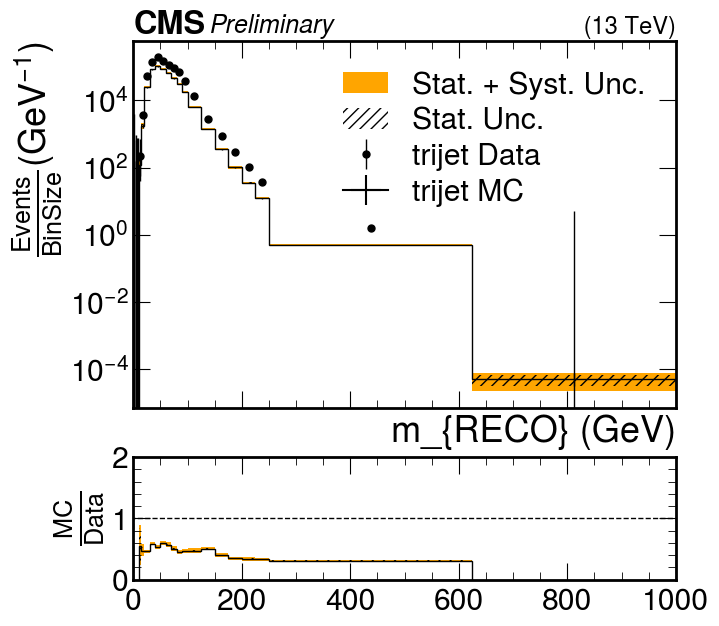

Syst unc up vals:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.22800416e-01 1.88275095e+02 1.54970131e+03
 1.17077757e+04 3.98816613e+04 7.05678992e+04 5.19170553e+04
 5.22243315e+04 3.15653695e+04 2.36364741e+04 1.13343076e+04
 1.32156112e+04 1.94253375e+03 6.07368447e+02 1.83287750e+02
 6.83680942e+01 1.89928862e+01 9.35728709e+00 7.80204519e-03]
Syst unc down vals:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.71297301e+01 1.26631221e+03
 9.50827921e+03 2.76299921e+04 5.13910606e+04 3.83787637e+04
 4.04664356e+04 3.03809617e+04 1.60778409e+04 1.08113361e+04
 1.12613912e+04 1.85685570e+03 5.67916024e+02 1.62803795e+02
 8.19467691e+01 1.63956995e+01 9.72803449e+00 8.10527177e-03]
widths [  0.5   0.5   2.    2.    2.5   2.5   5.    5.   10.   10.   10.   10.
  10.   10.   10.   10.   25.   25.   25.   25.   25.   25.  375.  375. ]
Total unc up:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

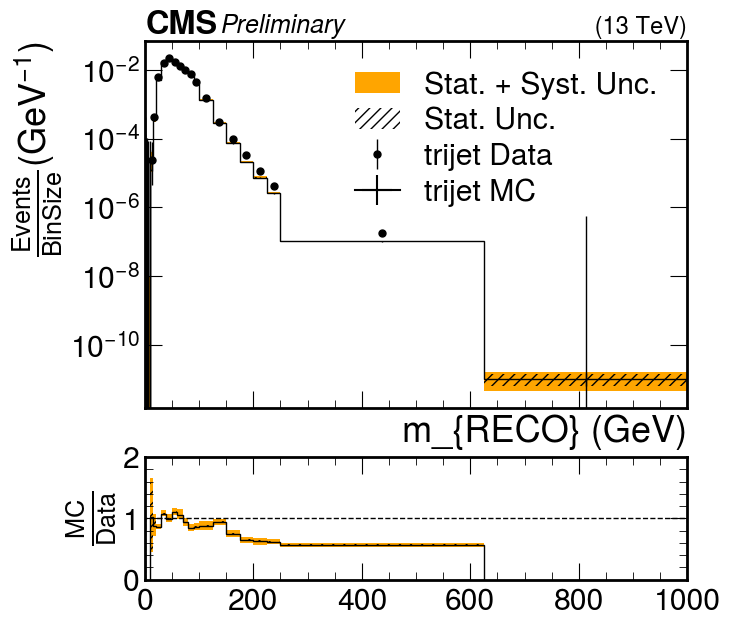

Syst unc up vals:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.31547062e+04 3.62653986e+04
 5.09533393e+04 3.88117754e+04 3.31622742e+04 3.12202568e+04
 2.62878968e+04 2.02596493e+04 8.79775687e+03 3.89106150e+03
 4.47579925e+02 8.80242734e+01 2.50166525e+01 5.79593324e+00
 2.23919548e+00 2.08174146e+00 4.28527845e-01 3.98691839e-06]
Syst unc down vals:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.86421344e+04 2.87496317e+04
 4.13423884e+04 2.67813647e+04 2.59660363e+04 2.44212448e+04
 2.06992348e+04 1.48661627e+04 6.60121049e+03 2.77497108e+03
 3.55067377e+02 1.03430730e+02 4.76227456e+01 3.45939250e+01
 1.52609796e+01 2.78082733e+00 5.39549941e-01 3.57365434e-03]
widths [  0.5   0.5   2.    2.    2.5   2.5   5.    5.   10.   10.   10.   10.
  10.   10.   10.   10.   25.   25.   25.   25.   25.   25.  375.  375. ]
Total unc up:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

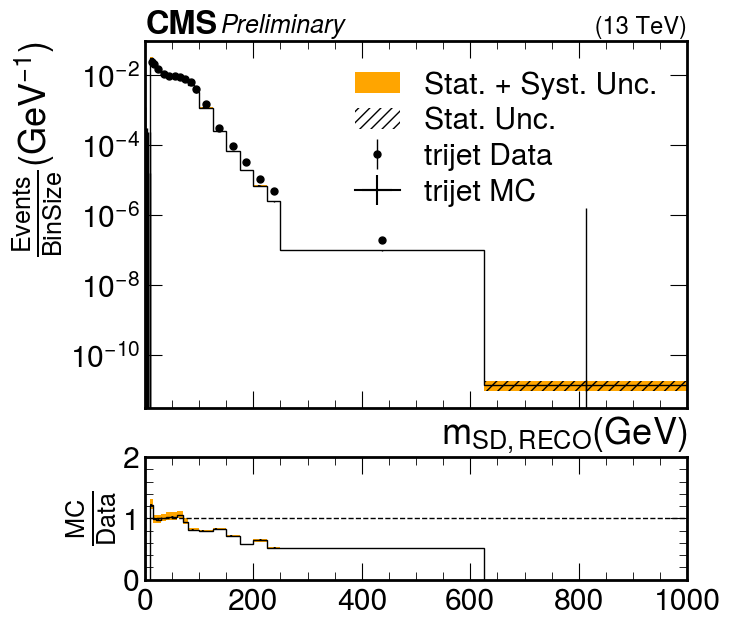

In [8]:
plotDataMCwErrors(result_mc, result_data, "response_matrix_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "trijet", rax_lim=[0,2])
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "trijet", rax_lim=[0,2], norm=True)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "trijet", rax_lim=[0.0,2], norm=True)

In [9]:
from python.plotting import plotSyst
#plotSyst(result_mc, "response_matrix_u", 'ptreco', label = r'2018 (13 TeV)', IOV='2018', channel='trijet', os_path=os_path)

Available axes:  ['syst', 'ptreco', 'mreco', 'ptgen', 'mgen']
Available systs  ['nominal', 'PUSFUp', 'PUSFDown', 'L1prefiringDown', 'L1prefiringUp', 'jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'Relative

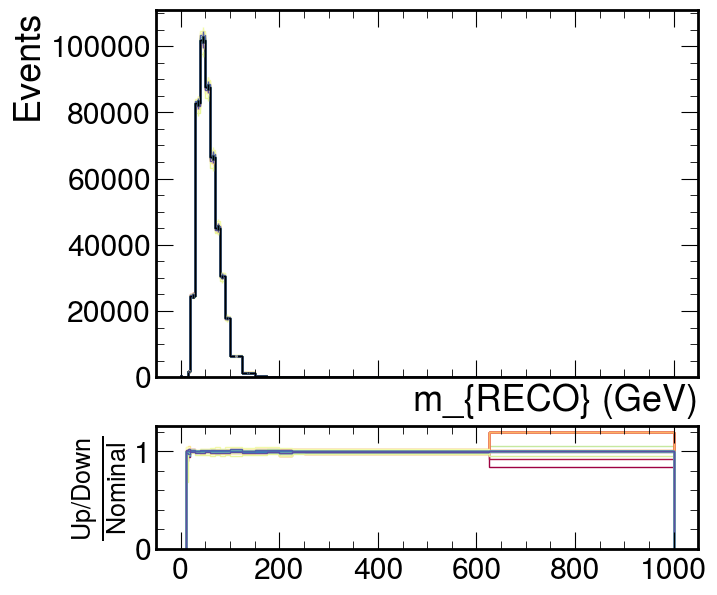

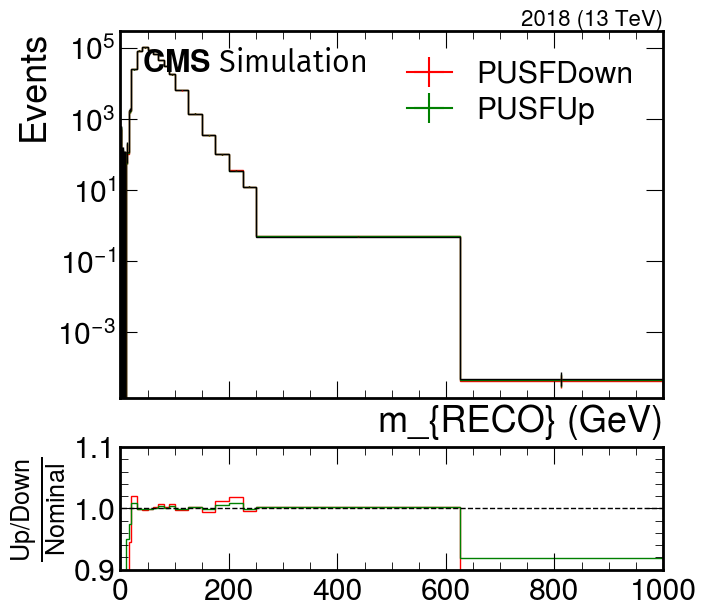

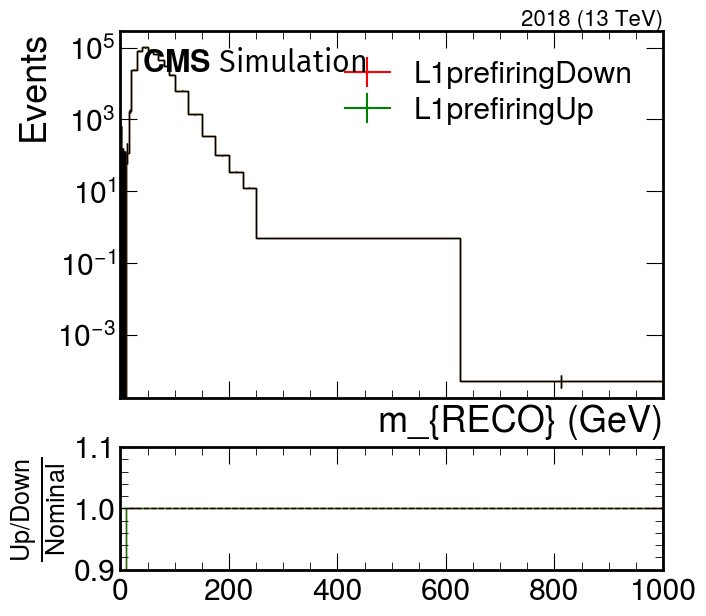

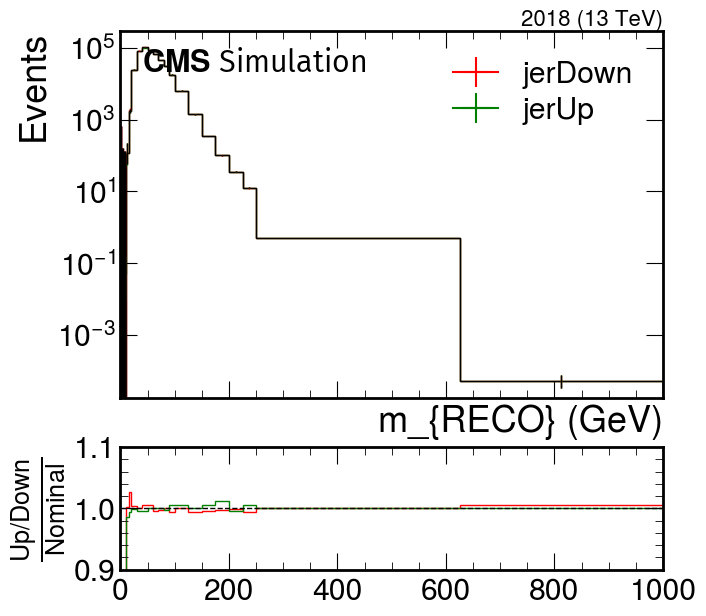

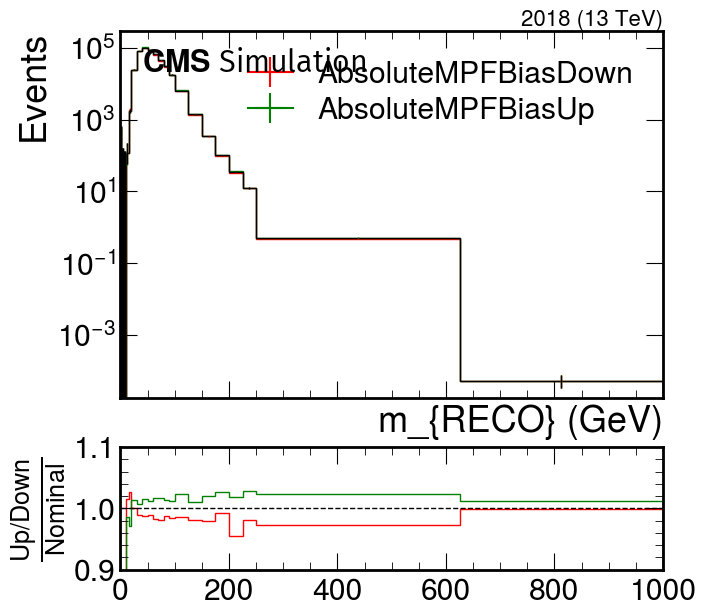

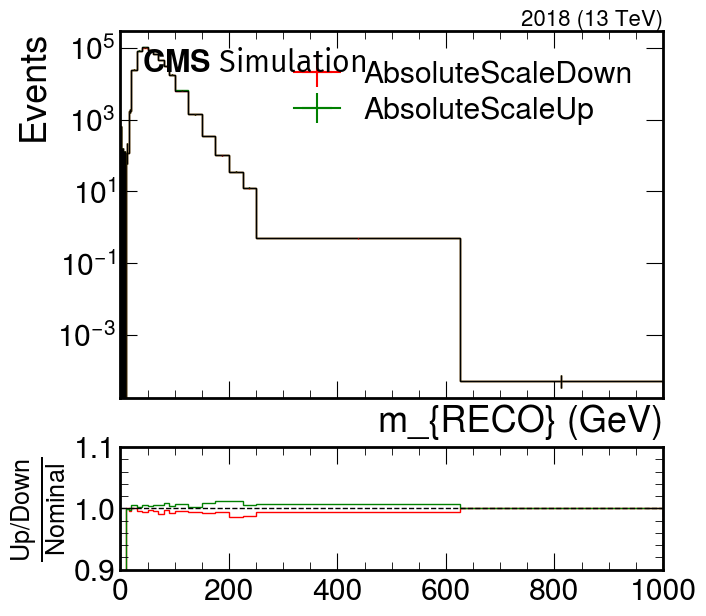

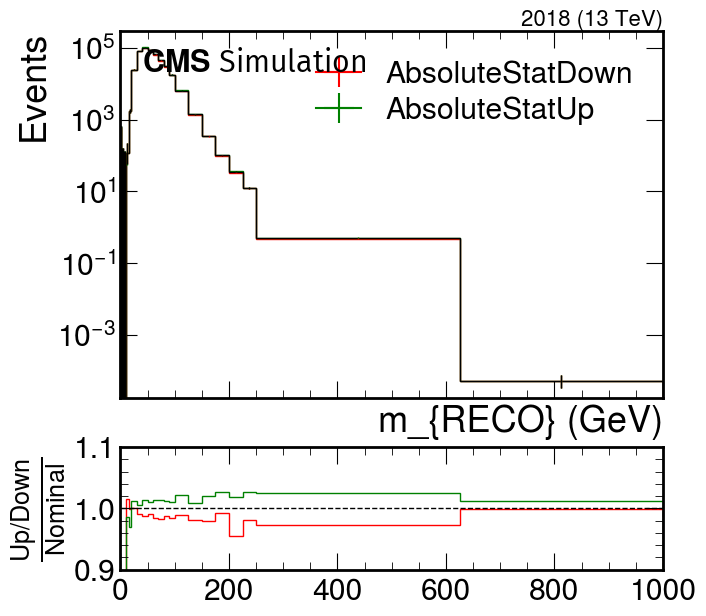

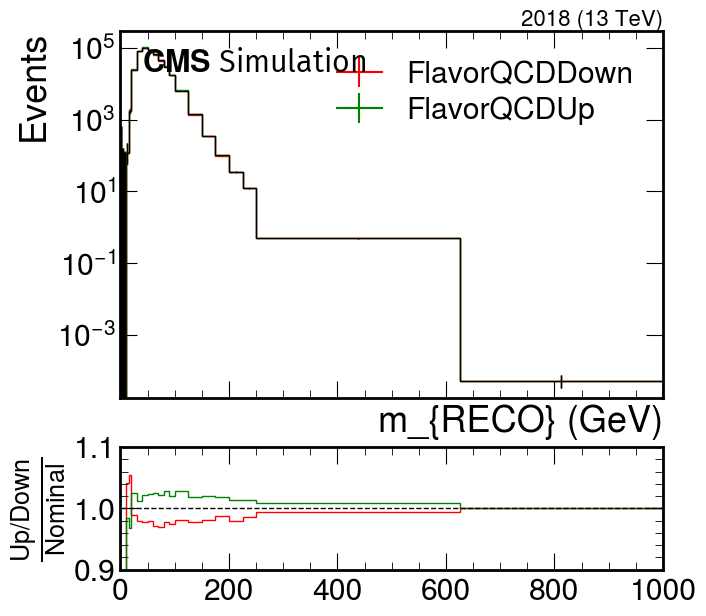

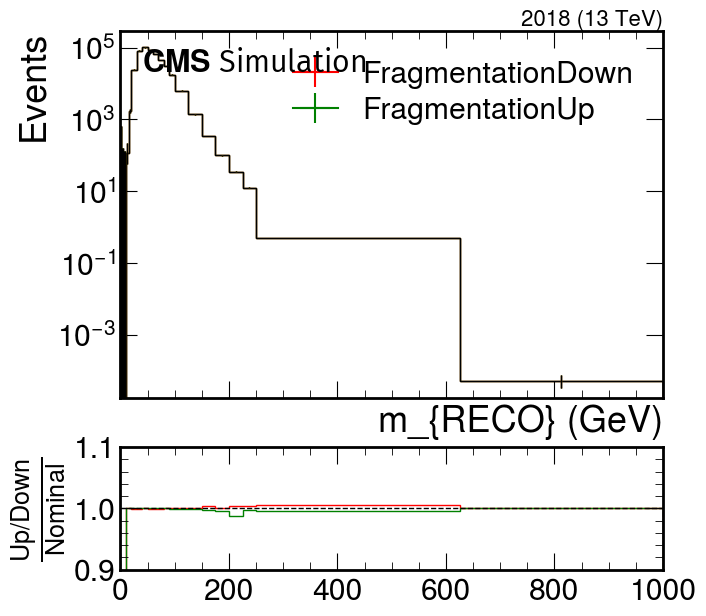

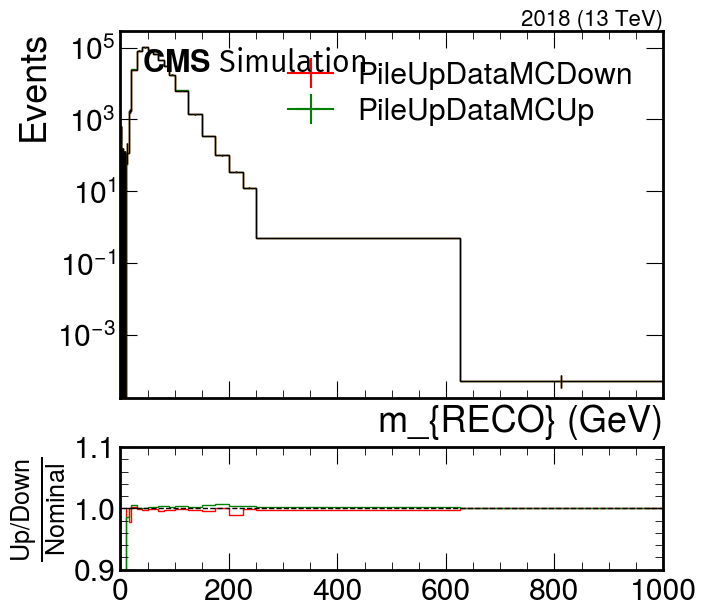

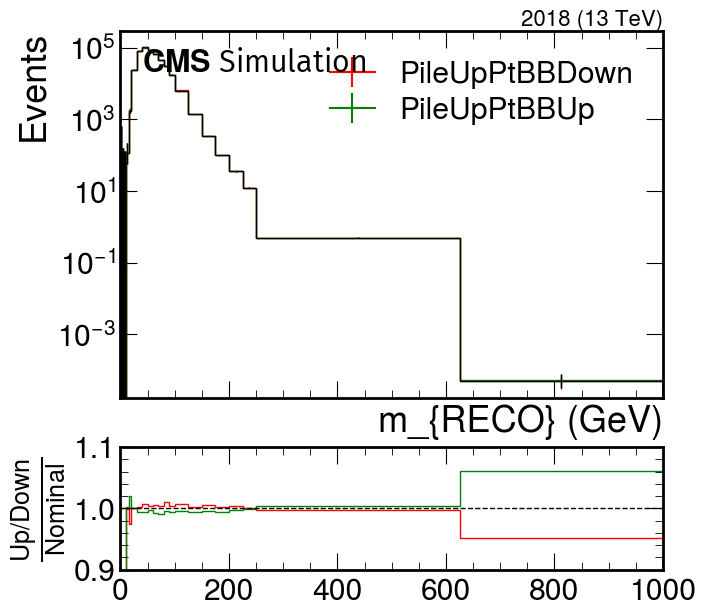

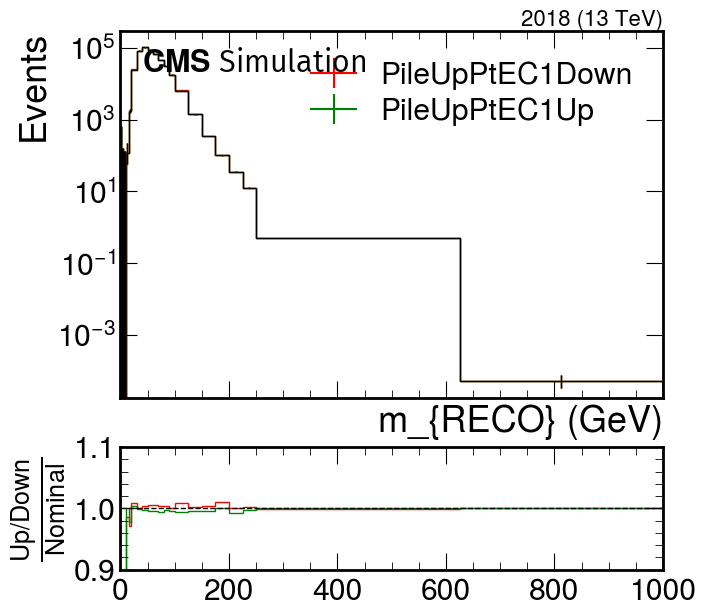

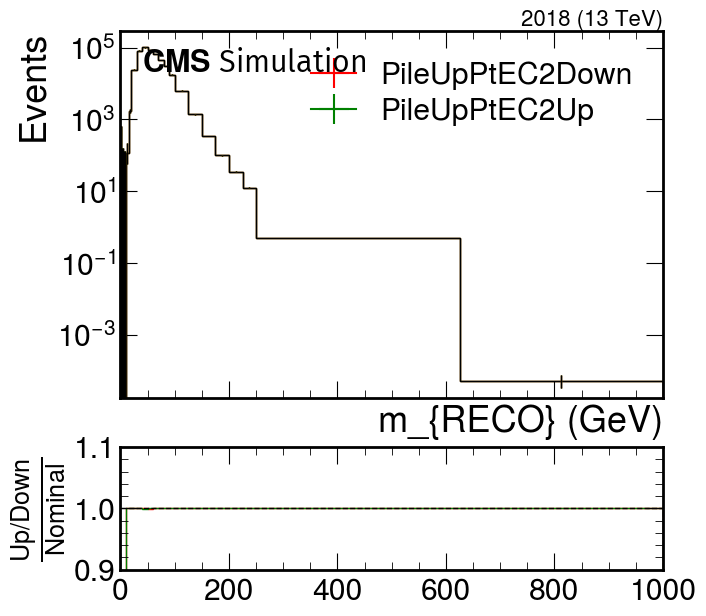

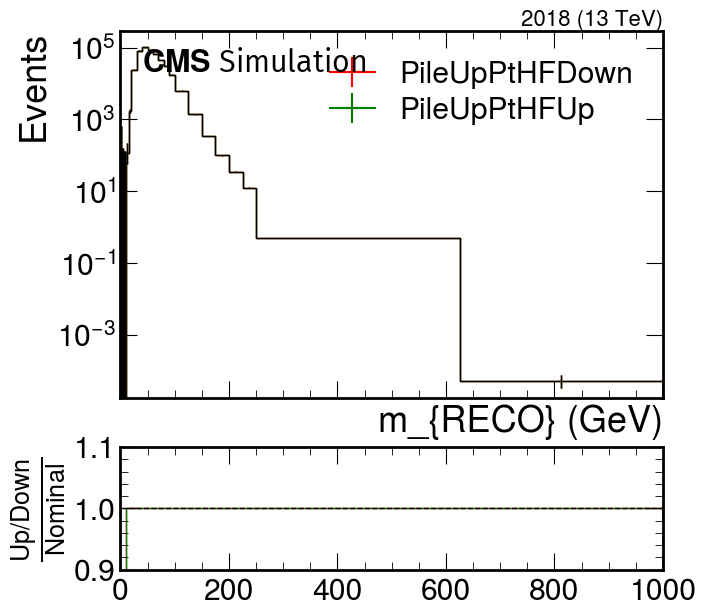

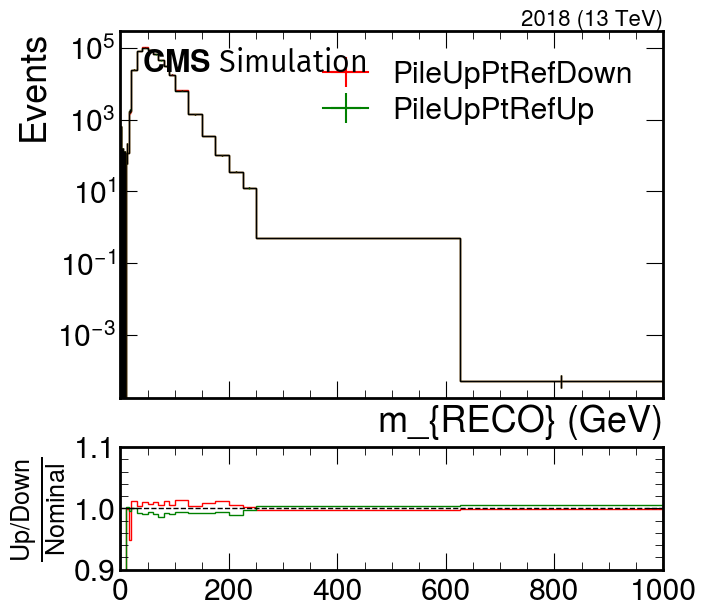

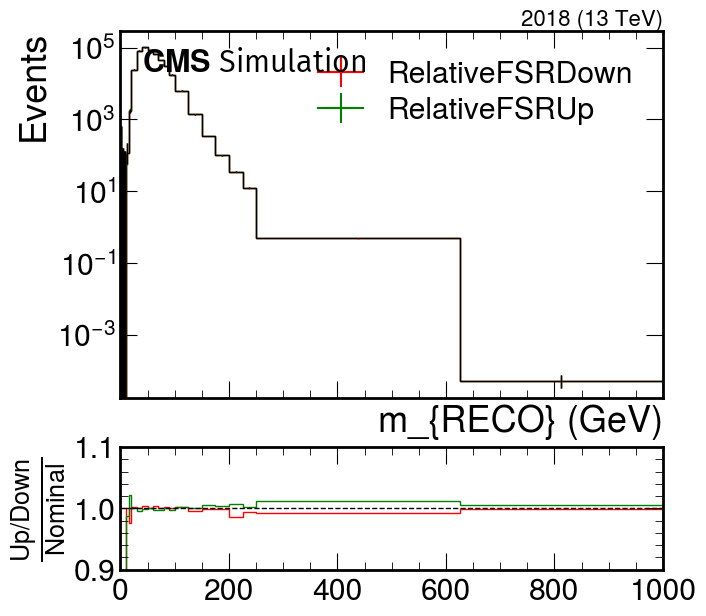

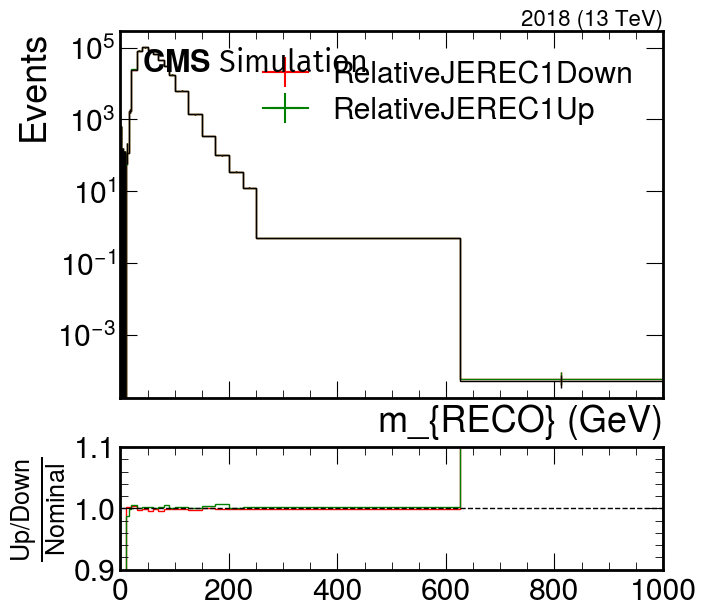

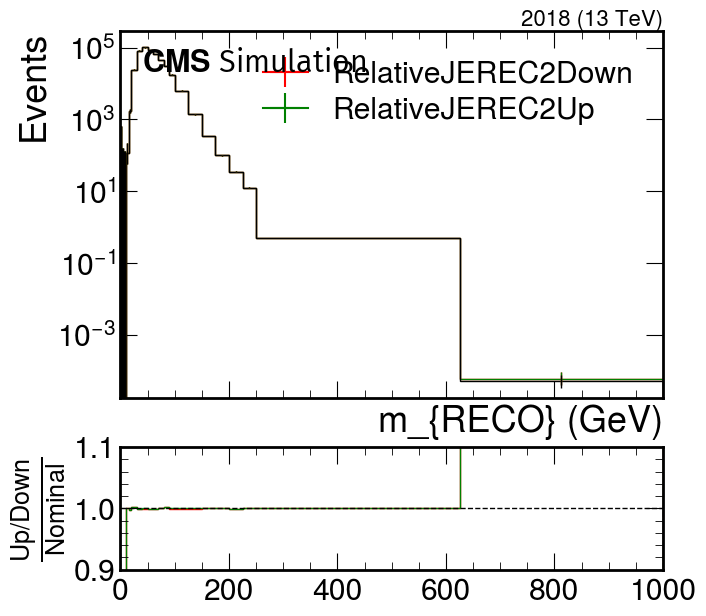

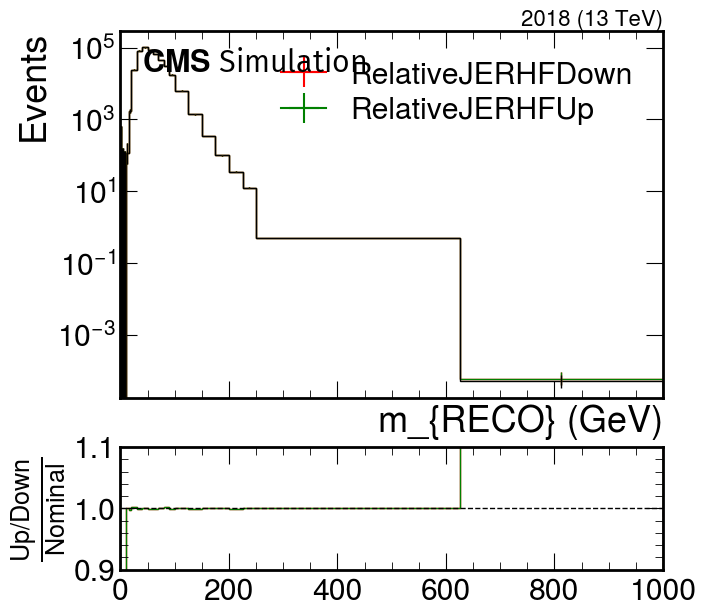

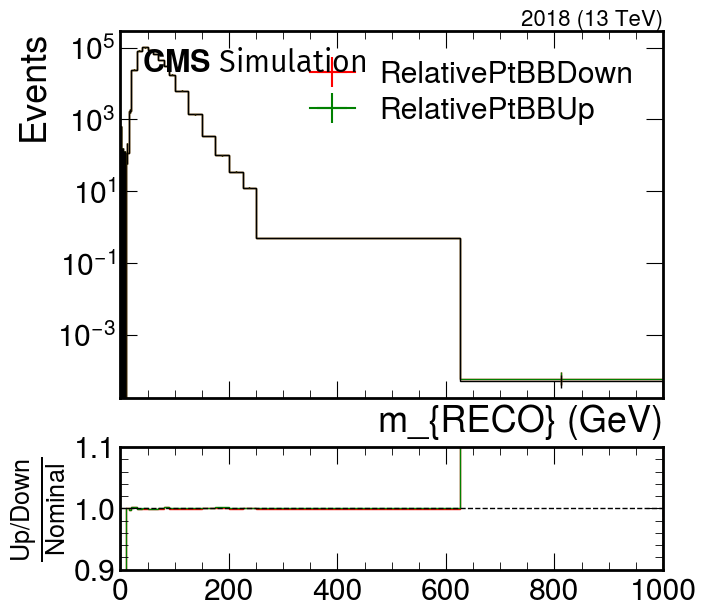

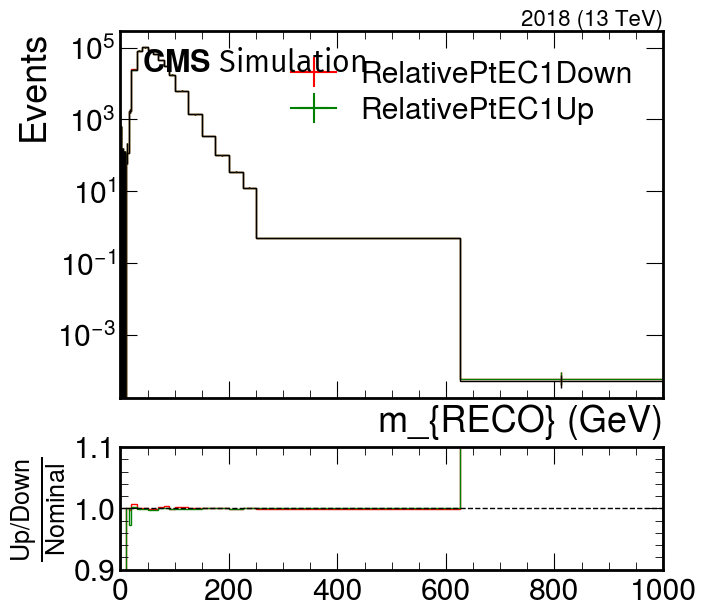

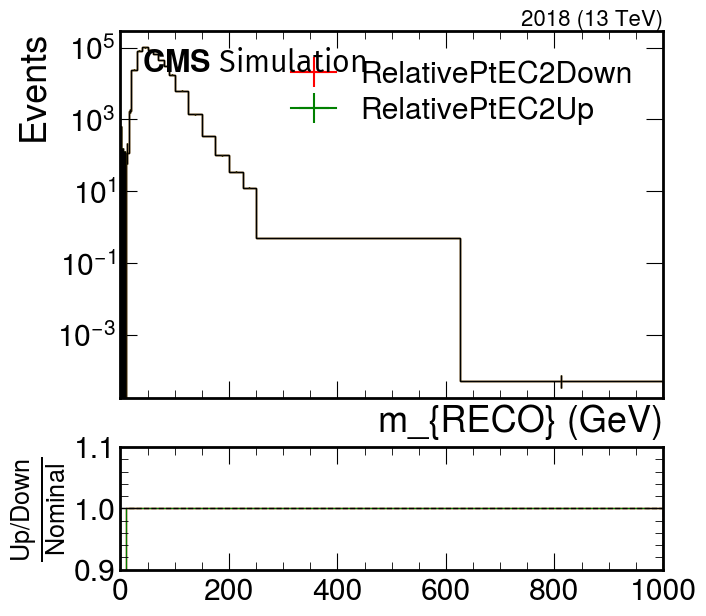

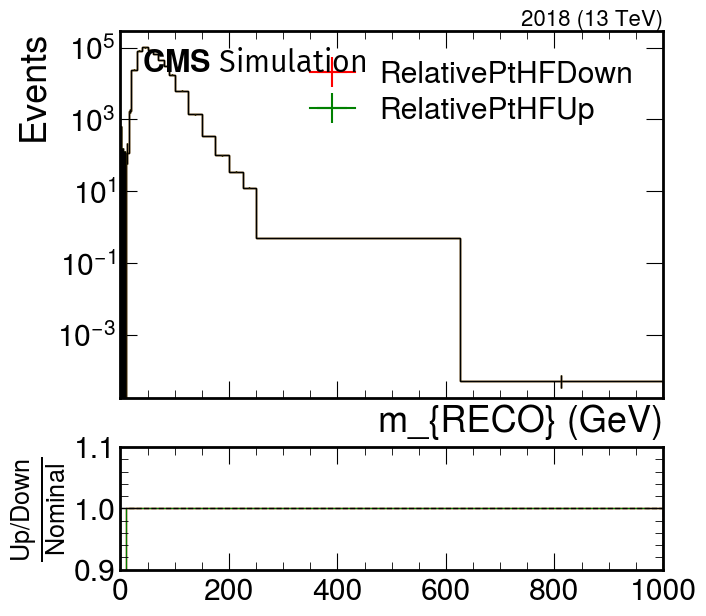

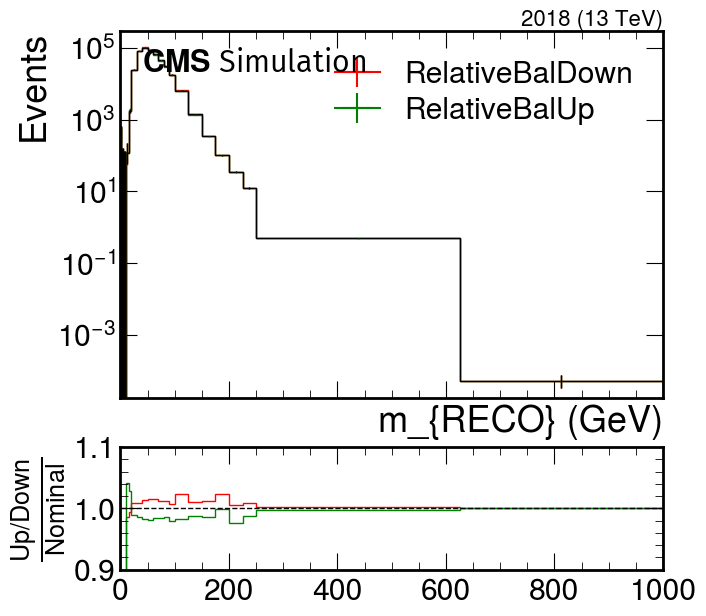

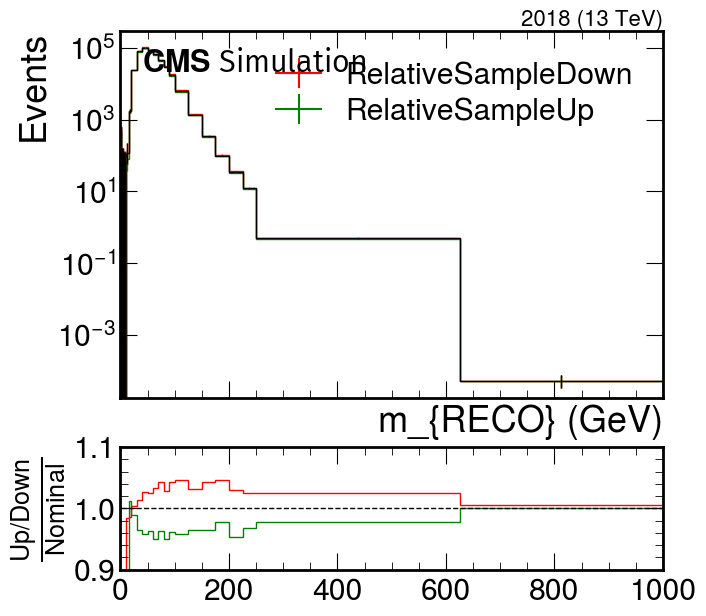

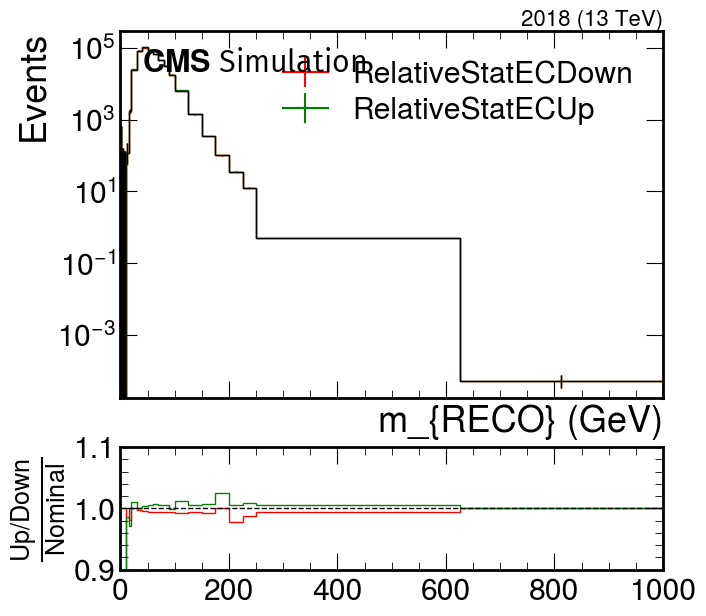

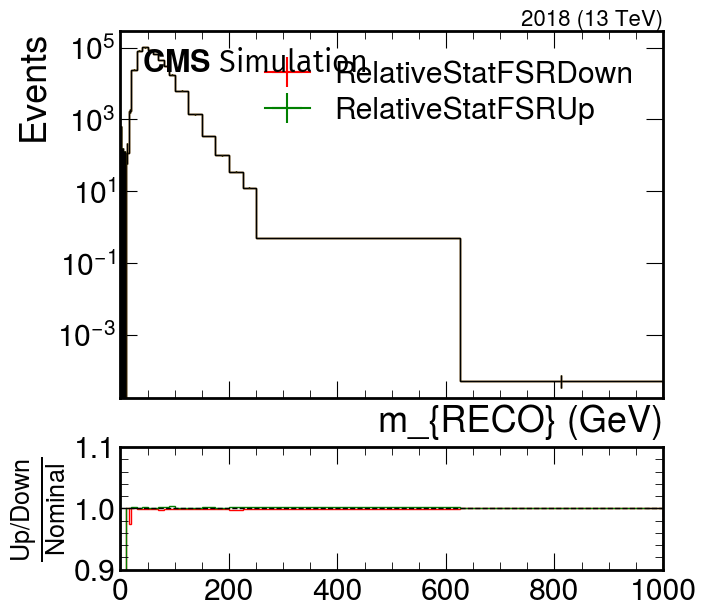

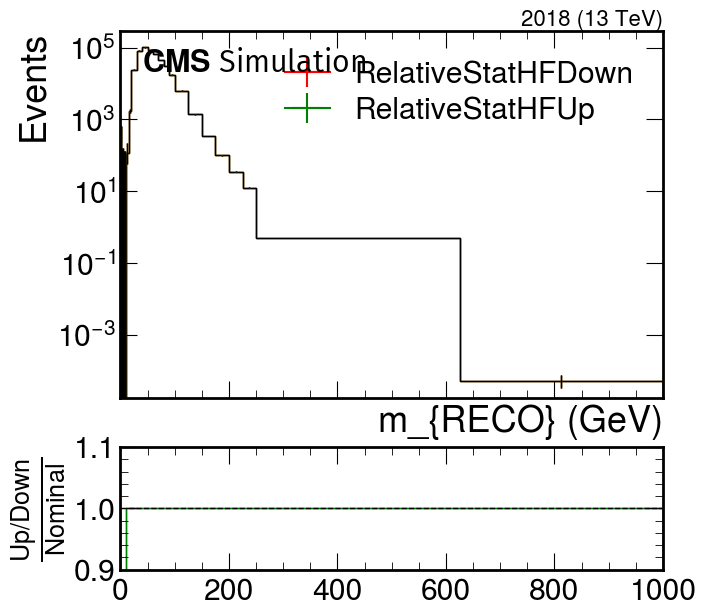

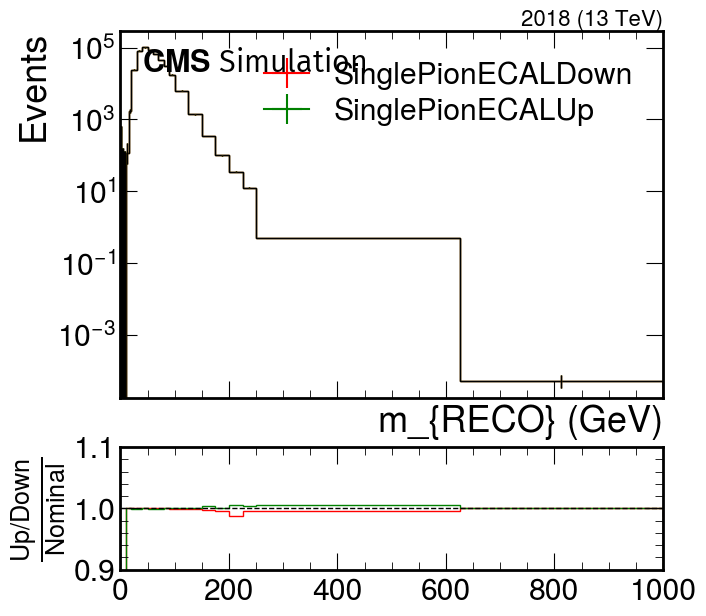

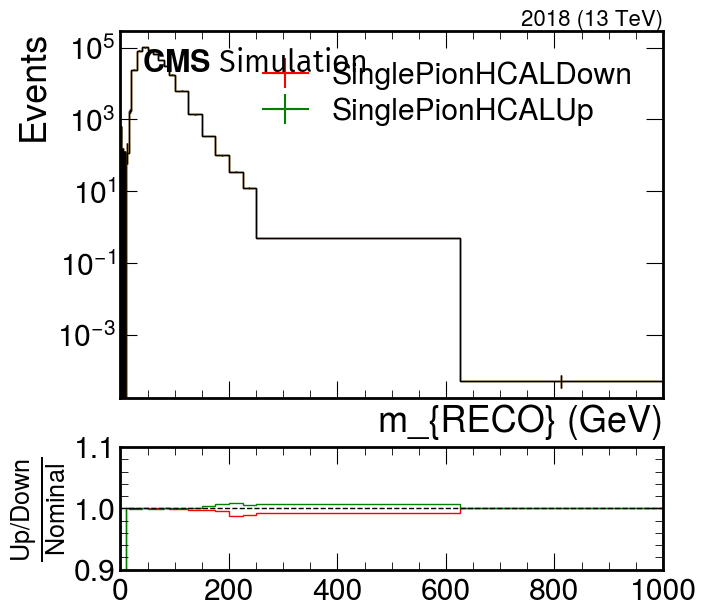

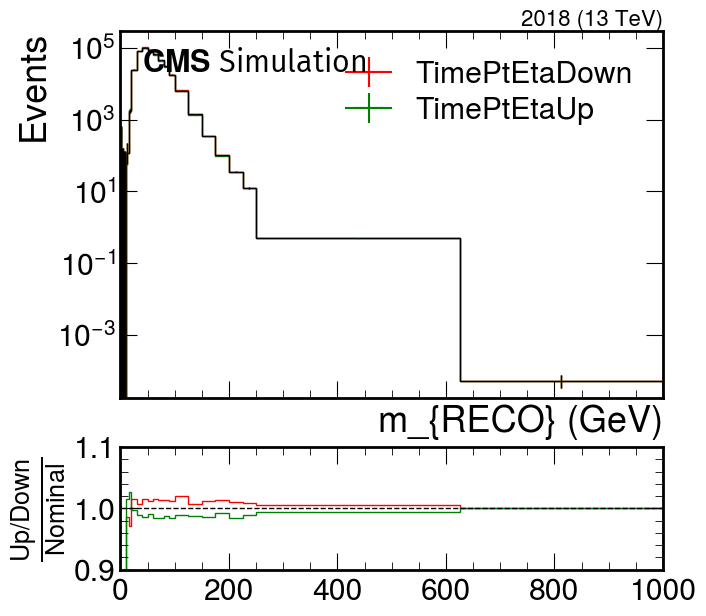

In [10]:
plotSyst(result_mc, "response_matrix_u", 'mreco', label = r'2018 (13 TeV)', IOV='2018', channel='trijet', os_path=os_path)

In [11]:
#### Plot dijet systematics
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.52018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
#fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUncRespOnlyNEW2018.pkl"
fname="coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018RespOnly.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )

year = fname[-8:-4]
# fname = "coffeaOutput/trijetHists_JetHT_pt200-Copy1.0_rappidity2.5_NoneHEMveto2018.pkl"
# with open(fname, "rb") as f:
#     result_mc_older = pickle.load( f )
if "trijet" in fname:
    os_path = 'plots/syst/trijet/'
else: os_path = 'plots/syst/dijet/'
# print(result_mc['cutflow'])
checkdir(os_path)

Syst unc up vals:  [1.55196393e+03 3.72399511e+02 1.05390070e+03 2.71478243e+03
 1.22101717e+04 2.53414399e+04 2.62564458e+05 1.50693854e+06
 1.52409652e+07 3.39567302e+07 3.55755087e+07 2.62329027e+07
 1.69814814e+07 1.07501316e+07 6.89648431e+06 4.43523895e+06
 5.20189386e+06 1.54271161e+06 4.65817362e+05 1.51828695e+05
 5.79120701e+04 2.34129670e+04 2.40029377e+04 4.96834799e+01]
Syst unc down vals:  [6.50975010e+02 2.71011762e+01 5.10586419e+02 1.55007442e+03
 6.12678335e+03 2.31928275e+04 1.99337872e+05 1.25339689e+06
 1.20378583e+07 2.62048489e+07 2.72842982e+07 1.98508049e+07
 1.30278211e+07 8.27510620e+06 5.27116275e+06 3.41376371e+06
 3.88594573e+06 1.19020040e+06 3.79129834e+05 1.29141181e+05
 5.50471490e+04 2.17509893e+04 2.25211454e+04 2.87644915e+01]
widths [  0.5   0.5   2.    2.    2.5   2.5   5.    5.   10.   10.   10.   10.
  10.   10.   10.   10.   25.   25.   25.   25.   25.   25.  375.  375. ]
Total unc up:  [2.59882982e+04 3.28352656e+03 1.38213254e+04 5.14248767e+

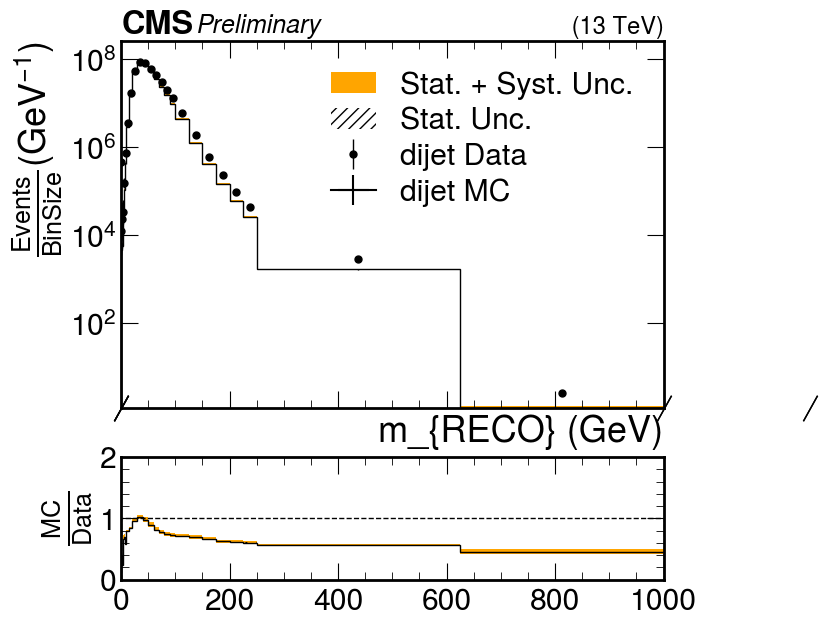

Syst unc up vals:  [1.39558263e+06 2.07269342e+06 1.76035053e+07 1.72115174e+07
 1.54076876e+07 1.04857499e+07 1.42630319e+07 9.98349802e+06
 1.39245128e+07 1.00237649e+07 9.06907926e+06 8.57799856e+06
 6.88188881e+06 4.77754376e+06 2.80984094e+06 1.22543745e+06
 8.08731001e+05 1.25599543e+05 3.31883486e+04 1.60299198e+04
 6.39342085e+03 2.84602508e+03 2.76325439e+03 1.65645417e+00]
Syst unc down vals:  [1.07852184e+06 1.63506360e+06 1.36736437e+07 1.33501931e+07
 1.19779242e+07 8.17465006e+06 1.11707099e+07 7.77192321e+06
 1.07723989e+07 7.77375204e+06 7.07182965e+06 6.71887090e+06
 5.37938674e+06 3.73664947e+06 2.19226321e+06 9.45958229e+05
 6.13058496e+05 8.93071945e+04 2.51231820e+04 1.12047979e+04
 4.67114598e+03 1.96345733e+03 1.88832474e+03 1.46473533e+00]
widths [  0.5   0.5   2.    2.    2.5   2.5   5.    5.   10.   10.   10.   10.
  10.   10.   10.   10.   25.   25.   25.   25.   25.   25.  375.  375. ]
Total unc up:  [4.24942243e+07 5.95854146e+07 4.91822765e+08 4.49889986e+

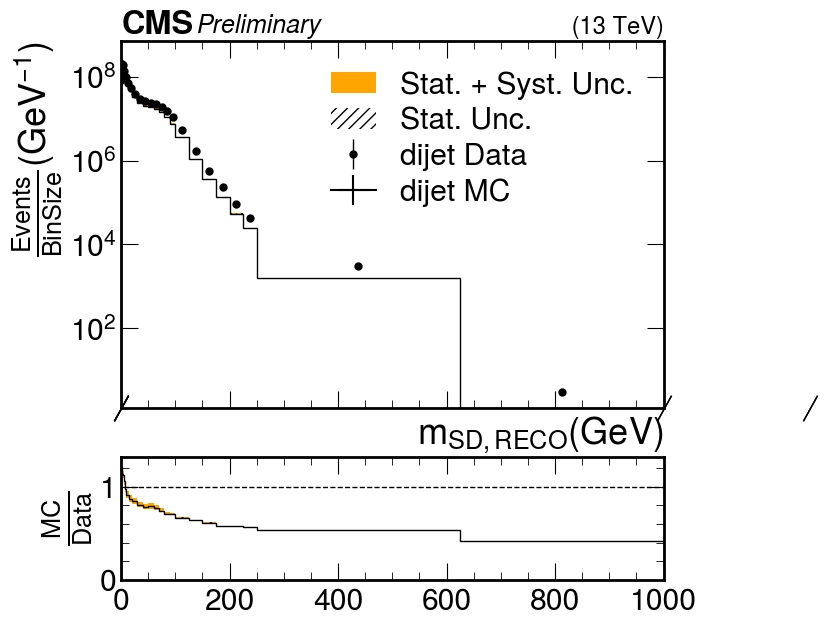

Syst unc up vals:  [1.04345292e+08 4.09277677e+07 1.09190362e+07 2.42108759e+06
 1.14010291e+06 2.15590503e+05 1.15101826e+05 5.98941564e+04
 1.53770446e+05 1.86328833e+03]
Syst unc down vals:  [8.12836357e+07 3.00951111e+07 8.21878479e+06 1.91985727e+06
 9.90272663e+05 2.02490424e+05 1.11543040e+05 5.76507222e+04
 1.28875565e+05 1.24242930e+03]
widths [   80.    80.    90.    70.   110.    60.    60.    50.   500. 11700.]
Total unc up:  [7.17948846e-01 2.31010207e-01 6.48001501e-02 1.56705158e-02
 8.55370150e-03 1.79903472e-03 1.00685577e-03 5.07011041e-04
 8.81887811e-04 1.82941307e-05]


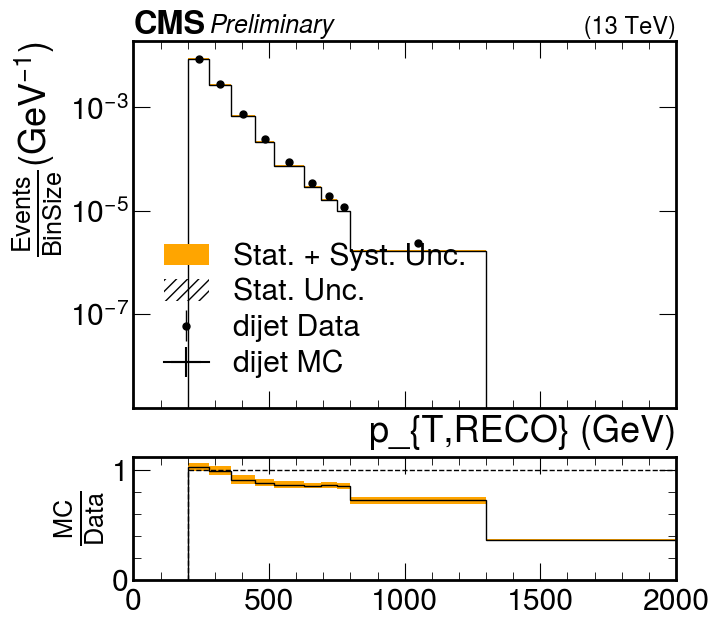

Syst unc up vals:  [1.55196393e+03 3.72399511e+02 1.05390070e+03 2.71478243e+03
 1.22101717e+04 2.53414399e+04 2.62564458e+05 1.50693854e+06
 1.52409652e+07 3.39567302e+07 3.55755087e+07 2.62329027e+07
 1.69814814e+07 1.07501316e+07 6.89648431e+06 4.43523895e+06
 5.20189386e+06 1.54271161e+06 4.65817362e+05 1.51828695e+05
 5.79120701e+04 2.34129670e+04 2.40029377e+04 4.96834799e+01]
Syst unc down vals:  [6.50975010e+02 2.71011762e+01 5.10586419e+02 1.55007442e+03
 6.12678335e+03 2.31928275e+04 1.99337872e+05 1.25339689e+06
 1.20378583e+07 2.62048489e+07 2.72842982e+07 1.98508049e+07
 1.30278211e+07 8.27510620e+06 5.27116275e+06 3.41376371e+06
 3.88594573e+06 1.19020040e+06 3.79129834e+05 1.29141181e+05
 5.50471490e+04 2.17509893e+04 2.25211454e+04 2.87644915e+01]
widths [  0.5   0.5   2.    2.    2.5   2.5   5.    5.   10.   10.   10.   10.
  10.   10.   10.   10.   25.   25.   25.   25.   25.   25.  375.  375. ]
Total unc up:  [6.78928249e-06 8.57801046e-07 3.61073595e-06 1.34344316e-

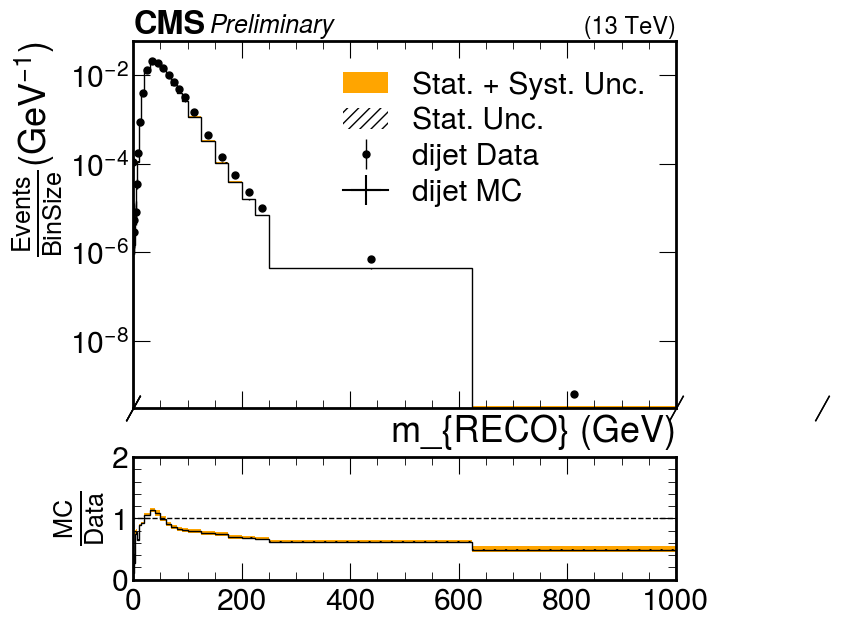

Syst unc up vals:  [1.39558263e+06 2.07269342e+06 1.76035053e+07 1.72115174e+07
 1.54076876e+07 1.04857499e+07 1.42630319e+07 9.98349802e+06
 1.39245128e+07 1.00237649e+07 9.06907926e+06 8.57799856e+06
 6.88188881e+06 4.77754376e+06 2.80984094e+06 1.22543745e+06
 8.08731001e+05 1.25599543e+05 3.31883486e+04 1.60299198e+04
 6.39342085e+03 2.84602508e+03 2.76325439e+03 1.65645417e+00]
Syst unc down vals:  [1.07852184e+06 1.63506360e+06 1.36736437e+07 1.33501931e+07
 1.19779242e+07 8.17465006e+06 1.11707099e+07 7.77192321e+06
 1.07723989e+07 7.77375204e+06 7.07182965e+06 6.71887090e+06
 5.37938674e+06 3.73664947e+06 2.19226321e+06 9.45958229e+05
 6.13058496e+05 8.93071945e+04 2.51231820e+04 1.12047979e+04
 4.67114598e+03 1.96345733e+03 1.88832474e+03 1.46473533e+00]
widths [  0.5   0.5   2.    2.    2.5   2.5   5.    5.   10.   10.   10.   10.
  10.   10.   10.   10.   25.   25.   25.   25.   25.   25.  375.  375. ]
Total unc up:  [1.11013538e-02 1.55663218e-02 1.28485661e-01 1.17530982e-

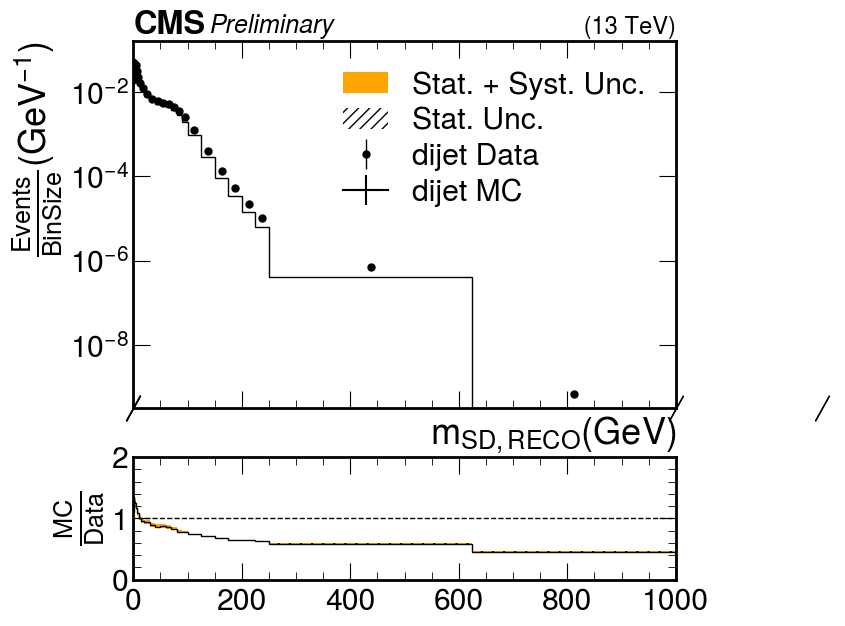

In [12]:

plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "dijet", rax_lim=[0,2])
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "dijet")
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "ptreco", IOV=2018, channel = "dijet", norm=True)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "dijet", norm=True, rax_lim=[0,2])
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "dijet", norm=True, rax_lim=[0,2])


In [13]:

#plotSyst(result_mc, "response_matrix_u", 'ptreco', label = r'2018 (13 TeV)', IOV='2018', channel='dijet')


Available axes:  ['syst', 'ptreco', 'mreco', 'ptgen', 'mgen']
Available systs  ['nominal', 'PUSFUp', 'L1prefiringDown', 'L1prefiringUp', 'PUSFDown', 'jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown']
Plotting all systematics available
Down -- plot both variations for up
Down -- plot both variations for up
Down -- plot both variations for up
Down -- plot both variations for up
Down -- plot both variations for up
Down -- plot both variations for up
Down -- plot

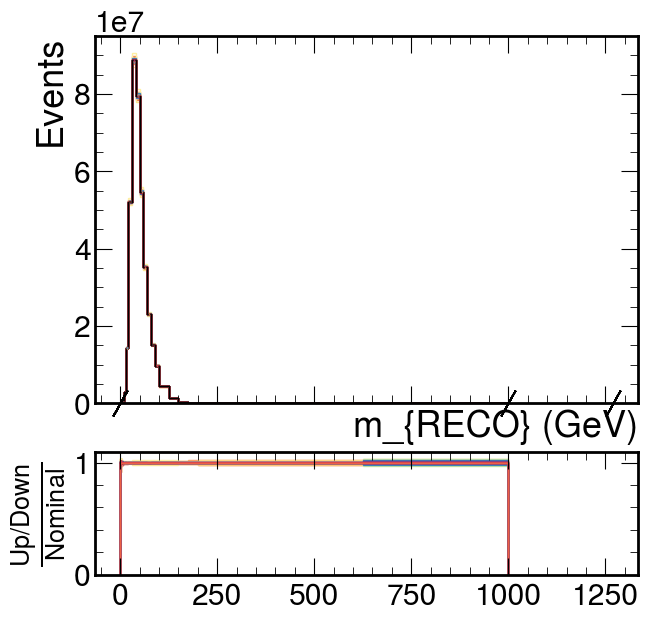

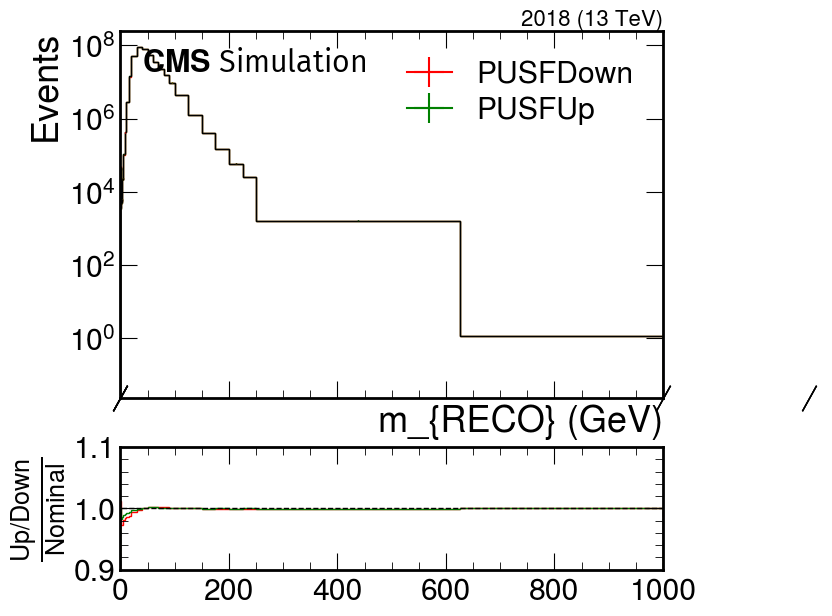

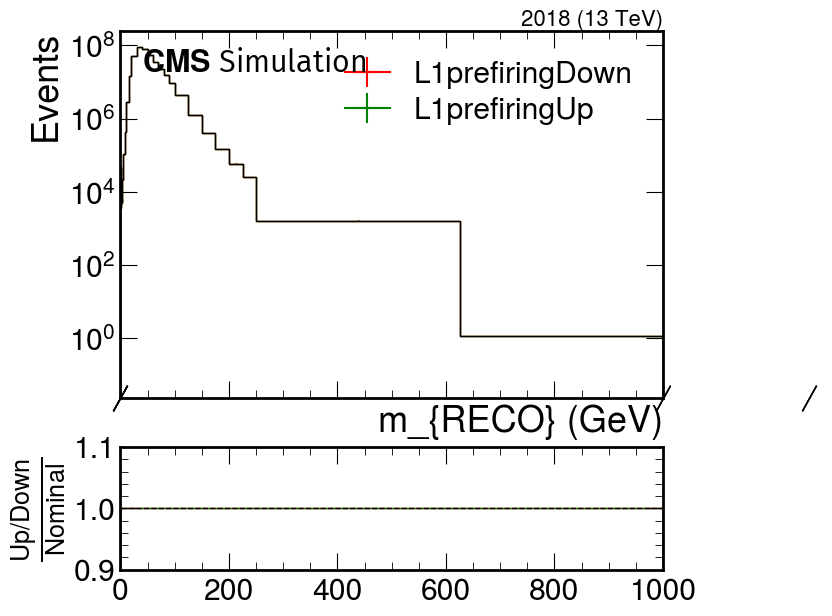

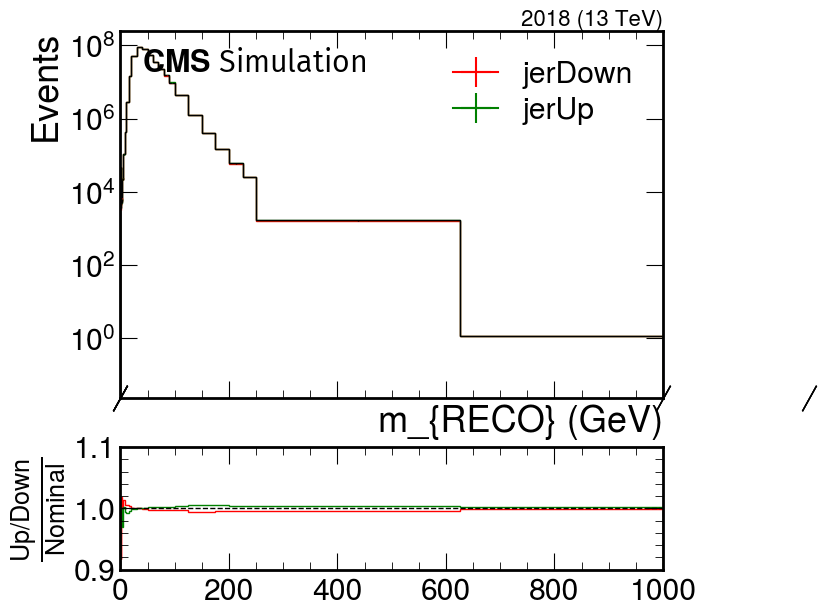

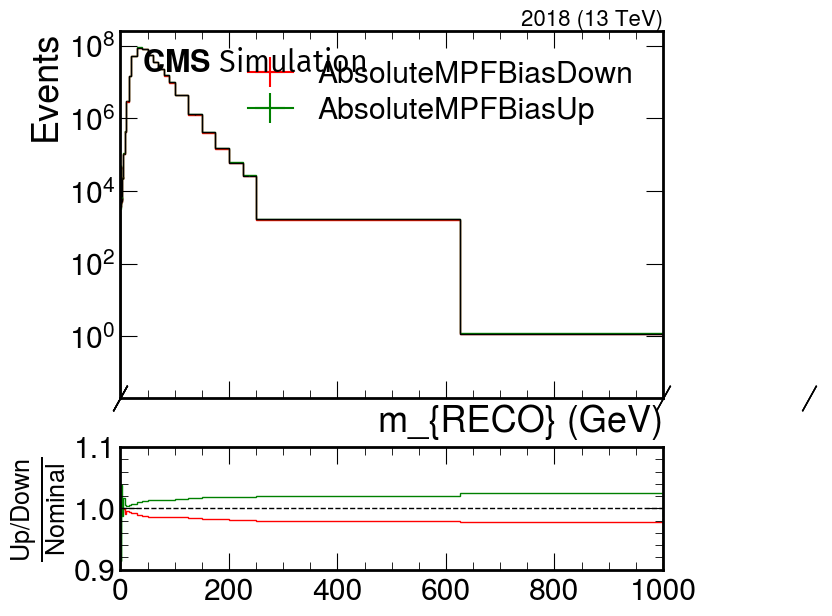

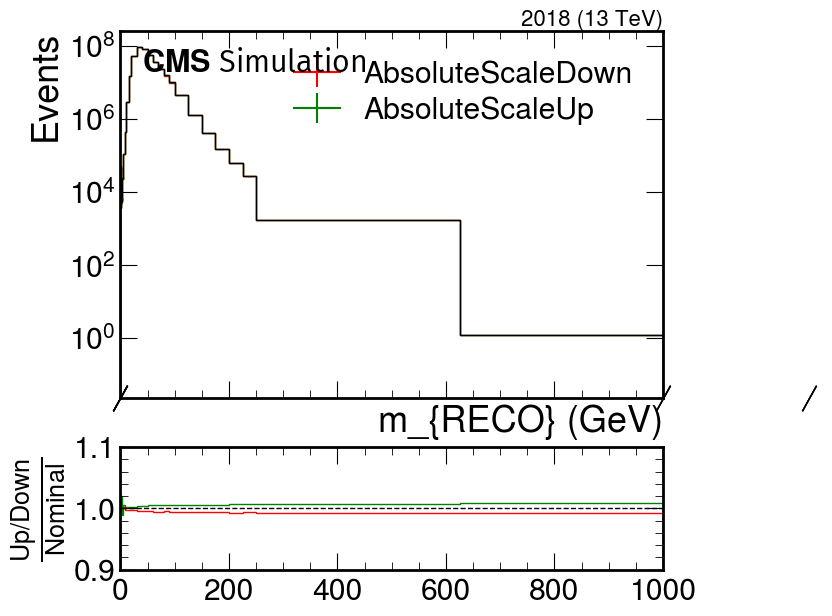

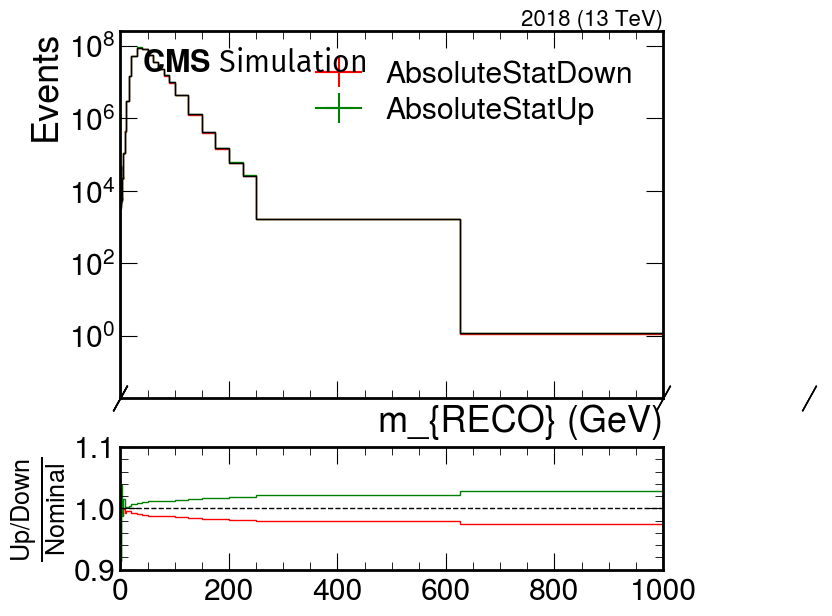

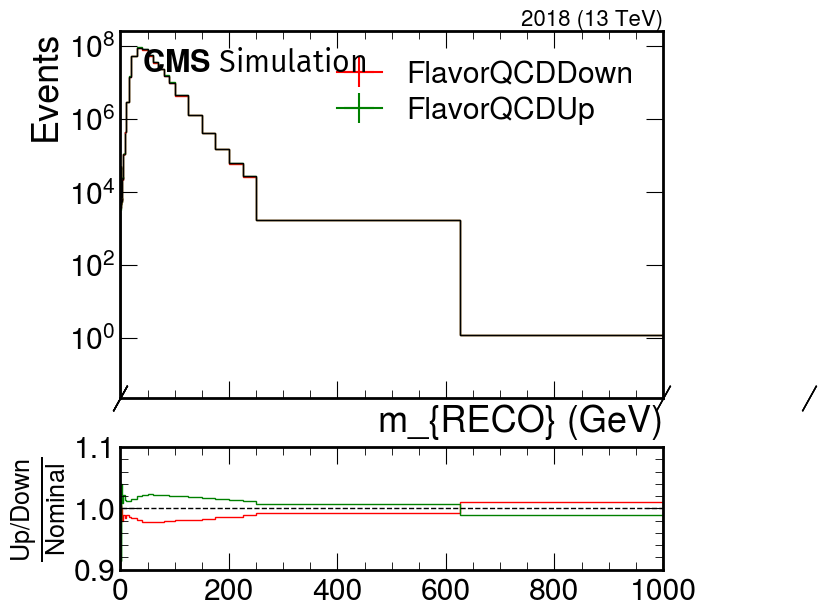

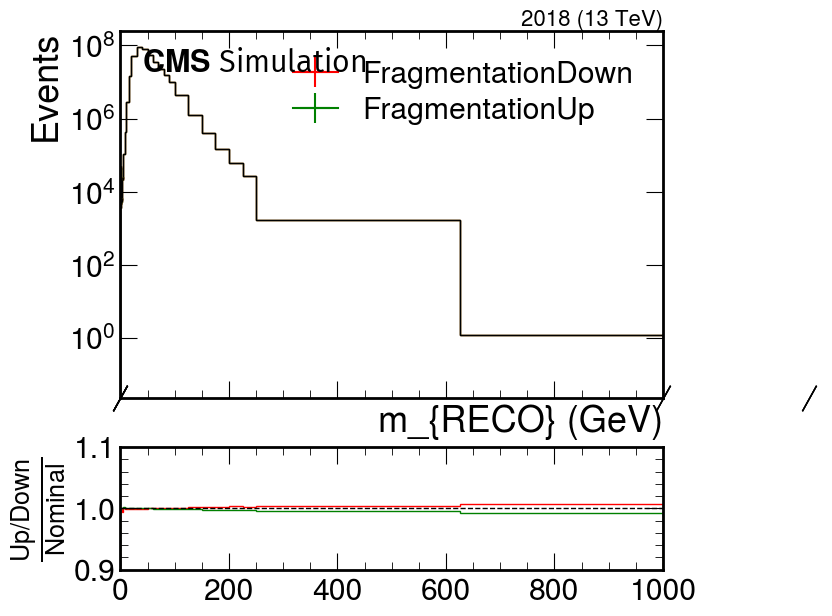

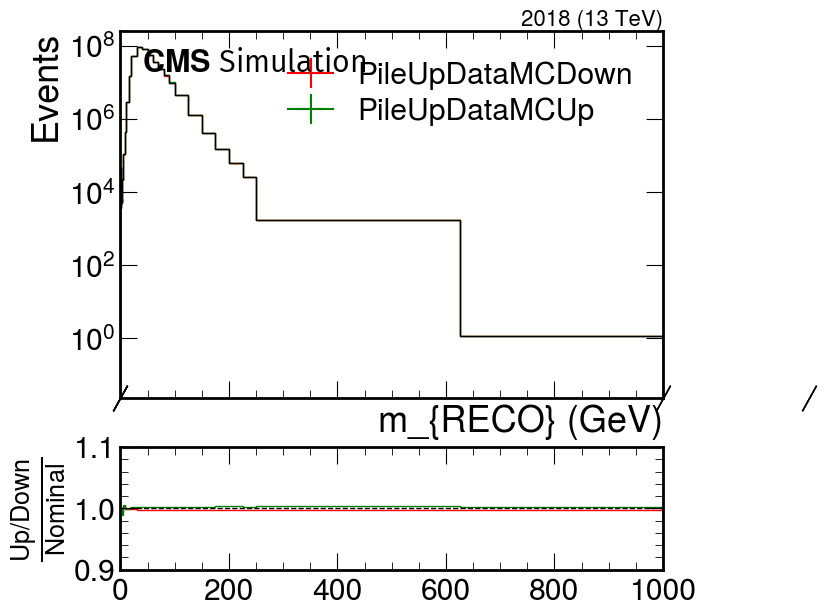

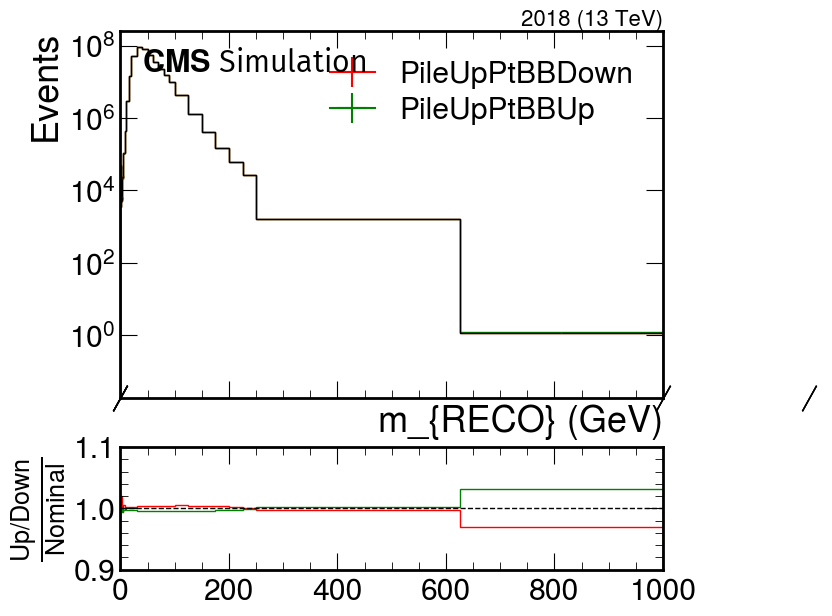

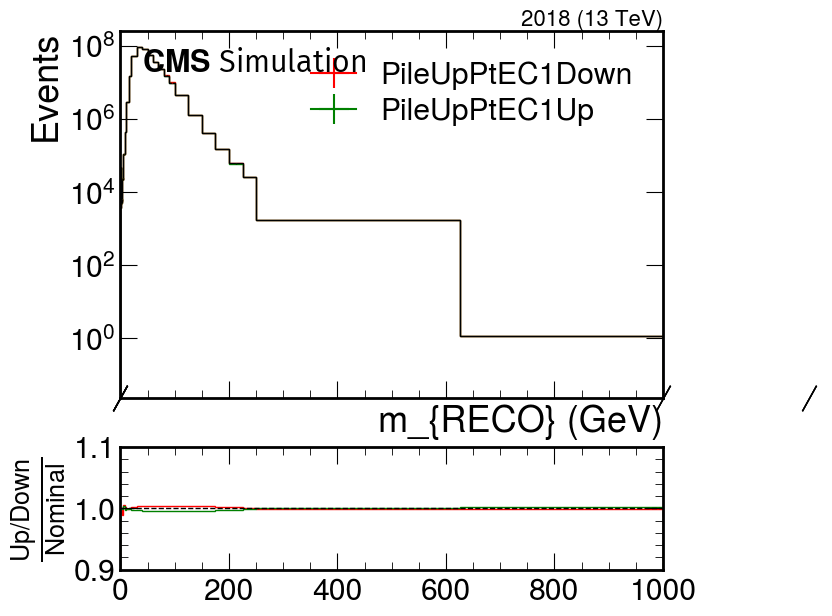

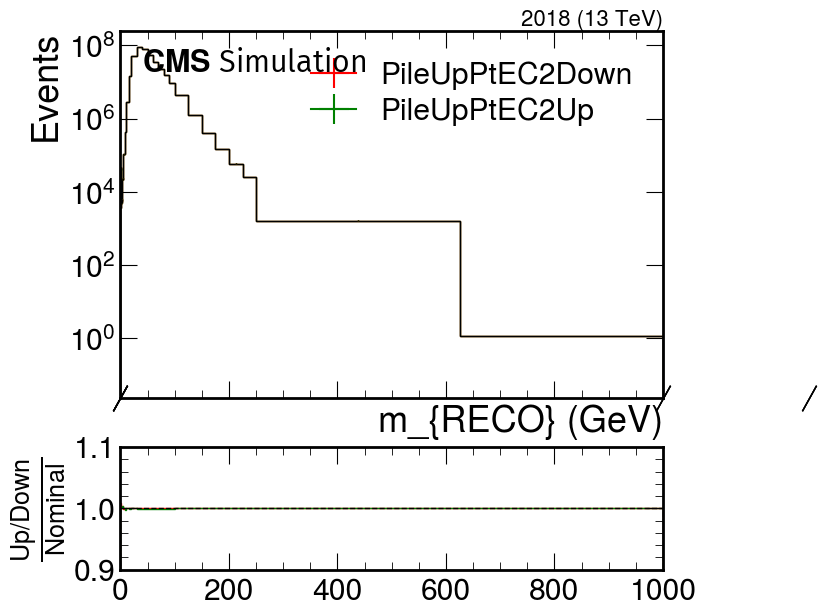

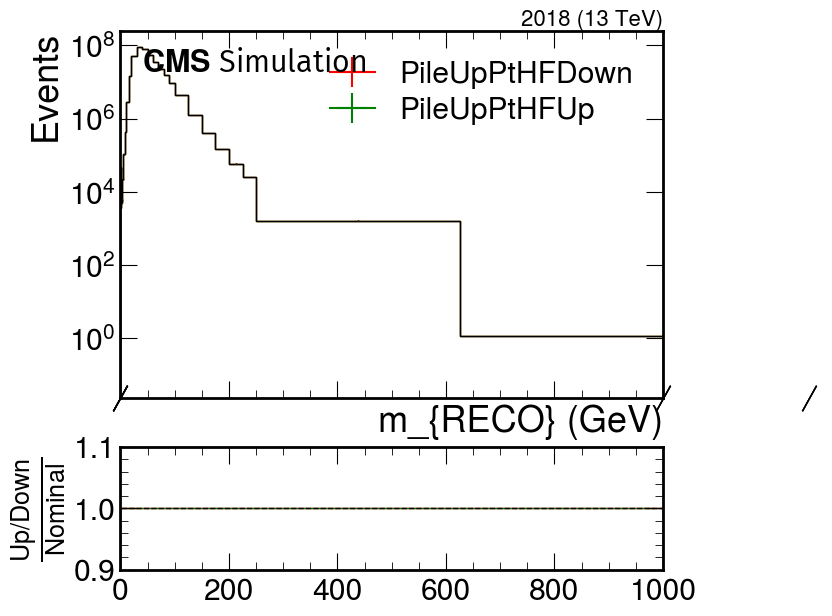

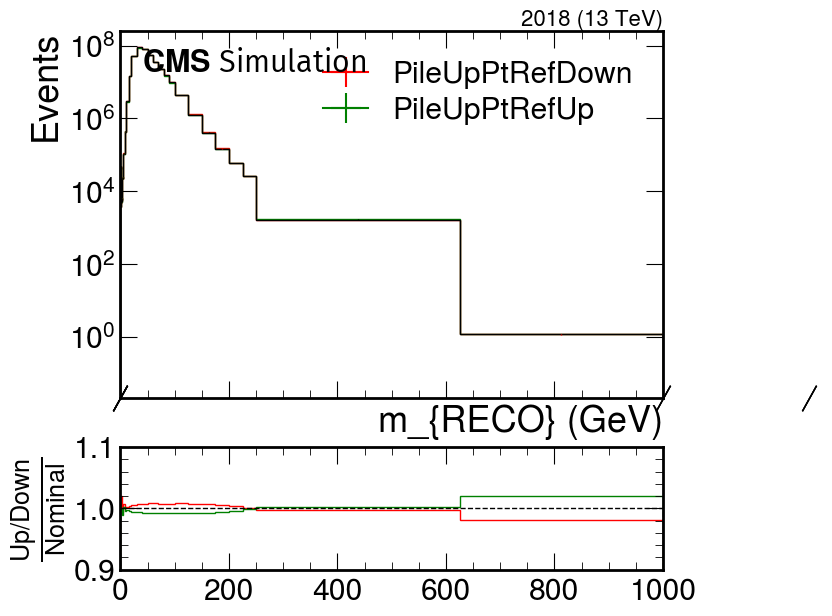

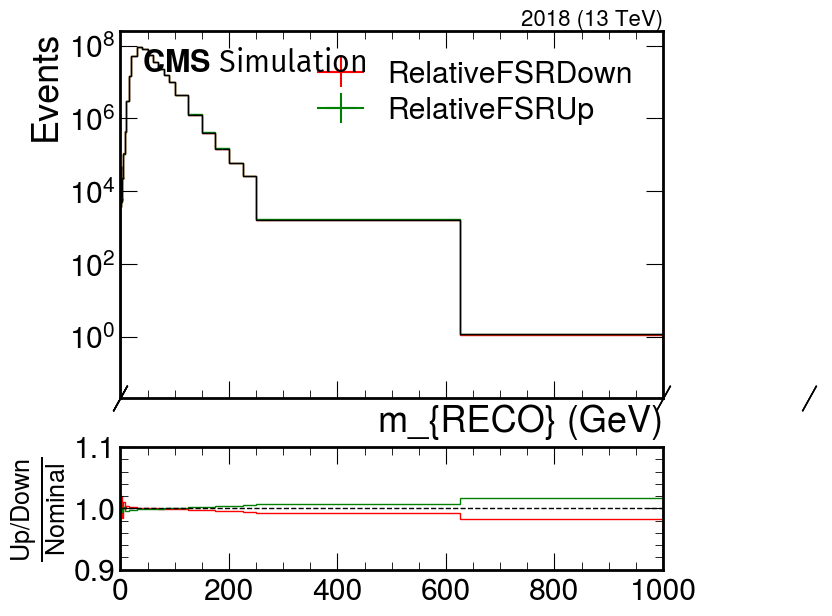

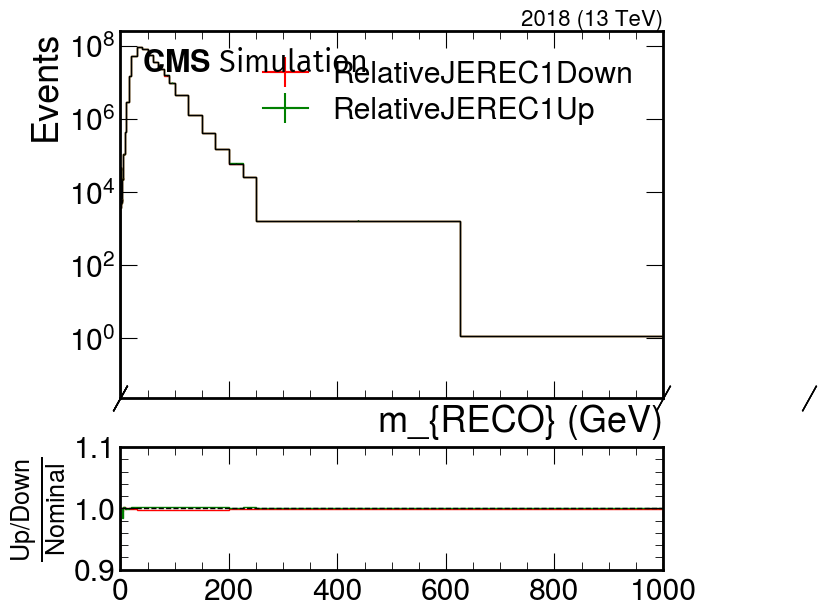

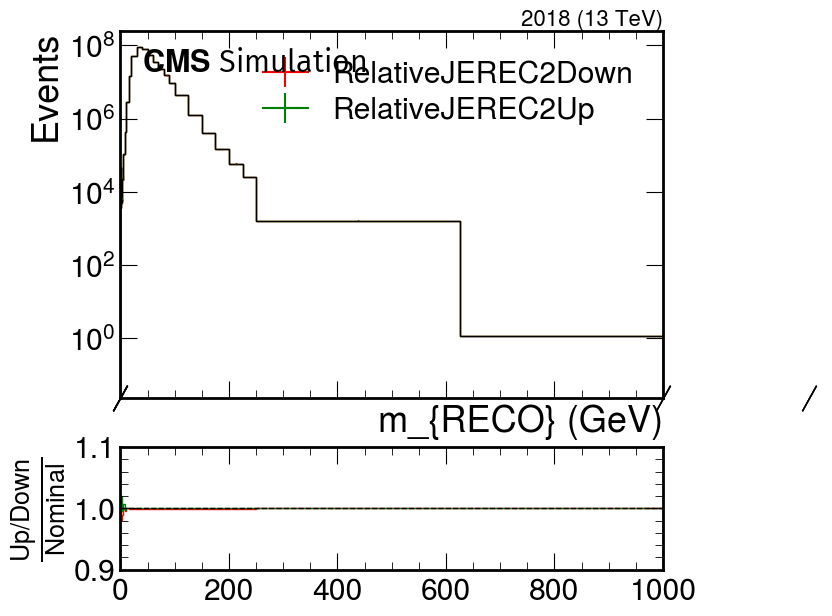

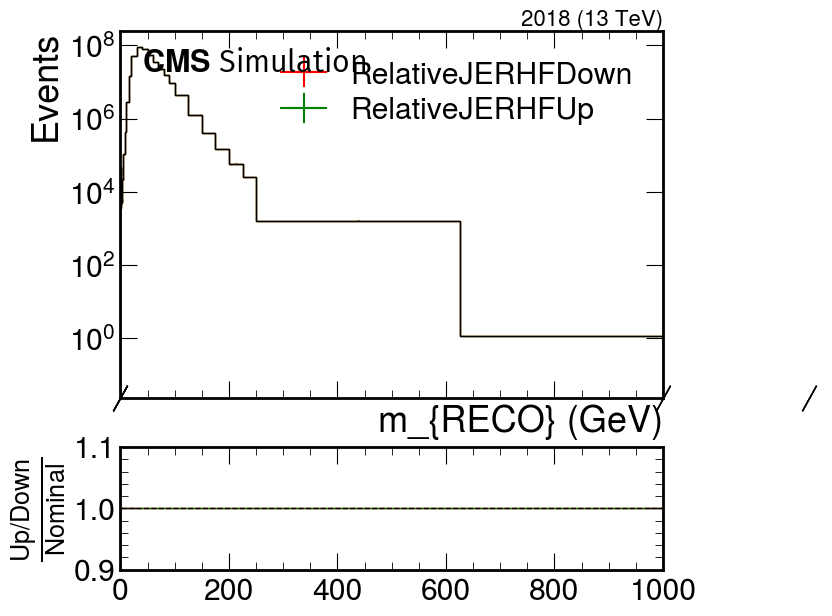

In [14]:

plotSyst(result_mc, "response_matrix_u", 'mreco', label = r'2018 (13 TeV)', IOV='2018', channel='dijet', os_path=os_path)


In [15]:
#### Plot dijet systematics

histname="ptreco_mreco_u"
availAxes = [ax.name for ax in result_hem[histname].axes]
availSysts = [ax for ax in result_hem[histname].project("syst").axes[0]]
print([ax for ax in result_hem[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
def compareDatasets(result, histname, axVar, syst=None):
    if syst==None:
        syst = "nominal"
    edges = [bin[0] for bin in result[0][histname].project(axVar).axes[0]] + [result[0][histname].project(axVar).axes[0][-1][1]]
    fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
    ratio = np.divide(result[0][histname][{'syst':syst}].project(axVar).values(),result[1][histname][{"syst":"nominal"}].project(axVar).values(),
                                    out=np.empty(np.array(result[1][histname][{"syst":syst}].project(axVar).values()).shape).fill(np.nan),
                                    where=result[1][histname][{"syst":syst}].project(axVar).values()!= 0,)
    hep.histplot(ratio, edges, stack=True, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
    hep.histplot(result[0][histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, ax=ax, density=False, linestyle ='-', color = 'red', linewidth=1,label="hemVeto")
    hep.histplot(result[1][histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, ax=ax, density=False, linestyle ='-', linewidth=1,label=syst)
    #### Fill ratio plot
    ax.set_xlabel(None)
    ax.autoscale(axis='x', tight=True)
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)
    hep.histplot(np.ones_like(ratio), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'black', linewidth=1)
    rax.set_ylabel(r'$\frac{HEMveto}{Nominal}$', loc = 'center')
    rax.set_ylim(0.9,1.1)
compareDatasets([result_hem, result], 'ptreco_mreco_u', 'mreco')
compareDatasets([result_hem, result], 'ptreco_mreco_u', 'ptreco')

NameError: name 'result_hem' is not defined

In [ ]:
data = [result[histname][{'syst':"nominal"}].project('mreco'), 
                  result[histname][{'syst':"nominal"}].project('mreco'),
         result[histname][{'syst':"nominal"}].project('ptreco'), 
                  result[histname][{'syst':"nominal"}].project('ptreco')]
hemdata = [result_hem[histname][{'syst':"nominal"}].project('mreco'), 
              result_hem[histname][{'syst':"nominal"}].project('mreco'),
     result_hem[histname][{'syst':"nominal"}].project('ptreco'), 
              result_hem[histname][{'syst':"nominal"}].project('ptreco')]
for i, mchist in enumerate(data):
    fig, ax, = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,7))
    # ax.autoscale(axis='x', tight=True)
    # grid = fig.add_gridspec(4,1, figure=fig, wspace=0, hspace=0)
    num = hemdata[i]
    denom = data[i]
    # main_ax = fig.add_subplot(grid[:-1, :])
    # plt.setp(main_ax.get_xticklabels(), visible=False)
    # main_ax.set_yscale("log")
    # main_ax.set_xlim([0,2200])
    # subplot_ax = fig.add_subplot(grid[-1, :], sharex=main_ax)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                          rp_num_label='hem',
                                          rp_denom_label="nominal",
                                          rp_uncert_draw_type="line",)
                                          # ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax})
    plt.ylabel("HEM/Nominal")
    plt.savefig(os_path+"/compareDataHEM_test.png")